# 📚 Análise Completa de Desempenho Acadêmico
## Análise Exploratória, Correlações e Machine Learning

---

**Objetivo:** Analisar dados acadêmicos e criar modelos preditivos para:
- Prever situação do aluno (Aprovado/Reprovado)
- Prever média final
- Identificar perfis de alunos (clustering)
- Extrair insights acionáveis

## 📦 1. Importação de Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Estatística
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

# Machine Learning - Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning - Modelos de Classificação
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Machine Learning - Modelos de Regressão
from sklearn.linear_model import LinearRegression

# Machine Learning - Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Machine Learning - Métricas
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    mean_squared_error, r2_score, mean_absolute_error,
    silhouette_score, davies_bouldin_score
)

# Configurações
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuração do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 📂 2. Carregamento e Exploração Inicial dos Dados

In [2]:
# Carregar dados do arquivo TXT (CSV)
df = pd.read_csv('/home/gabriel/Área de Trabalho/hapvida/hapvida-agents/trabalho_mestrado/dados_disciplinas.txt')  # Ajuste o caminho conforme necessário

print("="*70)
print("📊 INFORMAÇÕES GERAIS DA BASE DE DADOS")
print("="*70)
print(f"\n📏 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\n📋 Colunas: {list(df.columns)}")
print(f"\n🔢 Tipos de dados:")
print(df.dtypes)
print(f"\n❓ Valores faltantes:")
print(df.isnull().sum())
print(f"\n📝 Primeiras 10 linhas:")
df.head(10)

📊 INFORMAÇÕES GERAIS DA BASE DE DADOS

📏 Dimensões: 4642 linhas x 7 colunas

📋 Colunas: ['MATR_ALUNO', 'ANO', 'PERIODO', 'SITUACAO', 'MEDIA_FINAL', 'NUM_FALTAS', 'DISCIPLINA']

🔢 Tipos de dados:
MATR_ALUNO      int64
ANO             int64
PERIODO         int64
SITUACAO       object
MEDIA_FINAL     int64
NUM_FALTAS      int64
DISCIPLINA      int64
dtype: object

❓ Valores faltantes:
MATR_ALUNO     0
ANO            0
PERIODO        0
SITUACAO       0
MEDIA_FINAL    0
NUM_FALTAS     0
DISCIPLINA     0
dtype: int64

📝 Primeiras 10 linhas:


,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
5,5,2013,2,Aprovado,60,4,2
6,5,2014,2,Aprovado,97,8,4
7,6,2013,1,Reprovado por Frequencia,10,42,4
8,7,2013,1,Reprovado por Frequencia,10,45,2
9,8,2013,2,Equivalencia curricular,-1,-1,4


In [3]:
# Estatísticas descritivas
print("="*70)
print("📈 ESTATÍSTICAS DESCRITIVAS")
print("="*70)
df.describe()

📈 ESTATÍSTICAS DESCRITIVAS


,MATR_ALUNO,ANO,PERIODO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
count,4642.00,4642.00,4642.00,4642.00,4642.00,4642.00
mean,422.00,2014.99,1.49,41.60,11.30,3.03
std,218.81,1.44,0.50,33.94,15.47,1.40
min,1.00,2013.00,1.00,-1.00,-1.00,1.00
25%,237.00,2014.00,1.00,3.00,0.00,2.00
50%,407.00,2015.00,1.00,43.00,6.00,3.00
75%,606.00,2016.00,2.00,72.00,16.00,4.00
max,831.00,2017.00,2.00,100.00,78.00,5.00


In [4]:
# Informações sobre situações
print("="*70)
print("📌 DISTRIBUIÇÃO DAS SITUAÇÕES")
print("="*70)
print(df['SITUACAO'].value_counts())
print(f"\n📊 Percentuais:")
print(df['SITUACAO'].value_counts(normalize=True) * 100)

📌 DISTRIBUIÇÃO DAS SITUAÇÕES
SITUACAO
Aprovado                    2077
Reprovado                   1117
Reprovado por Frequencia     921
Dispensado                   456
Equivalencia curricular       37
Trancamento parcial           34
Name: count, dtype: int64

📊 Percentuais:
SITUACAO
Aprovado                   44.74
Reprovado                  24.06
Reprovado por Frequencia   19.84
Dispensado                  9.82
Equivalencia curricular     0.80
Trancamento parcial         0.73
Name: proportion, dtype: float64


## 🧹 3. Limpeza e Preparação dos Dados

In [5]:
# Criar uma cópia para trabalhar
df_clean = df.copy()

# Tratar valores especiais (-1) que indicam situações especiais
print("🔍 Verificando valores -1 (situações especiais):")
print(f"MEDIA_FINAL = -1: {(df_clean['MEDIA_FINAL'] == -1).sum()} registros")
print(f"NUM_FALTAS = -1: {(df_clean['NUM_FALTAS'] == -1).sum()} registros")

# Criar flag para situações especiais
df_clean['SITUACAO_ESPECIAL'] = df_clean['SITUACAO'].isin([
    'Dispensado', 'Equivalencia curricular', 'Trancamento parcial'
])

# Criar dataset apenas com situações normais para modelagem
df_normal = df_clean[
    ~df_clean['SITUACAO_ESPECIAL'] & 
    (df_clean['MEDIA_FINAL'] >= 0) & 
    (df_clean['NUM_FALTAS'] >= 0)
].copy()

print(f"\n✅ Dataset original: {len(df_clean)} registros")
print(f"✅ Dataset para análise: {len(df_normal)} registros")
print(f"🗑️  Registros removidos: {len(df_clean) - len(df_normal)} ({((len(df_clean) - len(df_normal))/len(df_clean)*100):.1f}%)")

🔍 Verificando valores -1 (situações especiais):
MEDIA_FINAL = -1: 525 registros
NUM_FALTAS = -1: 527 registros

✅ Dataset original: 4642 registros
✅ Dataset para análise: 4115 registros
🗑️  Registros removidos: 527 (11.4%)


In [6]:
# Criar variáveis derivadas
print("🔧 Criando features derivadas...")

# Simplificar situação para classificação binária
df_normal['APROVADO'] = df_normal['SITUACAO'].apply(
    lambda x: 1 if x == 'Aprovado' else 0
)

# Classificação da situação em categorias
def classificar_situacao(situacao):
    if situacao == 'Aprovado':
        return 'Aprovado'
    elif 'Frequencia' in situacao:
        return 'Reprovado por Frequência'
    else:
        return 'Reprovado por Nota'

df_normal['TIPO_SITUACAO'] = df_normal['SITUACAO'].apply(classificar_situacao)

# Faixa de nota
def faixa_nota(nota):
    if nota >= 90:
        return 'Excelente (90-100)'
    elif nota >= 70:
        return 'Bom (70-89)'
    elif nota >= 60:
        return 'Regular (60-69)'
    else:
        return 'Insuficiente (<60)'

df_normal['FAIXA_NOTA'] = df_normal['MEDIA_FINAL'].apply(faixa_nota)

# Faixa de faltas
def faixa_faltas(faltas):
    if faltas == 0:
        return 'Sem faltas'
    elif faltas <= 5:
        return 'Poucas faltas (1-5)'
    elif faltas <= 15:
        return 'Faltas moderadas (6-15)'
    else:
        return 'Muitas faltas (>15)'

df_normal['FAIXA_FALTAS'] = df_normal['NUM_FALTAS'].apply(faixa_faltas)

print("✅ Features criadas com sucesso!")
print(f"\nNovas colunas: {[col for col in df_normal.columns if col not in df.columns]}")

🔧 Criando features derivadas...
✅ Features criadas com sucesso!

Novas colunas: ['SITUACAO_ESPECIAL', 'APROVADO', 'TIPO_SITUACAO', 'FAIXA_NOTA', 'FAIXA_FALTAS']


## 📊 4. Análise Exploratória de Dados (EDA)

### 4.1 Distribuições Gerais

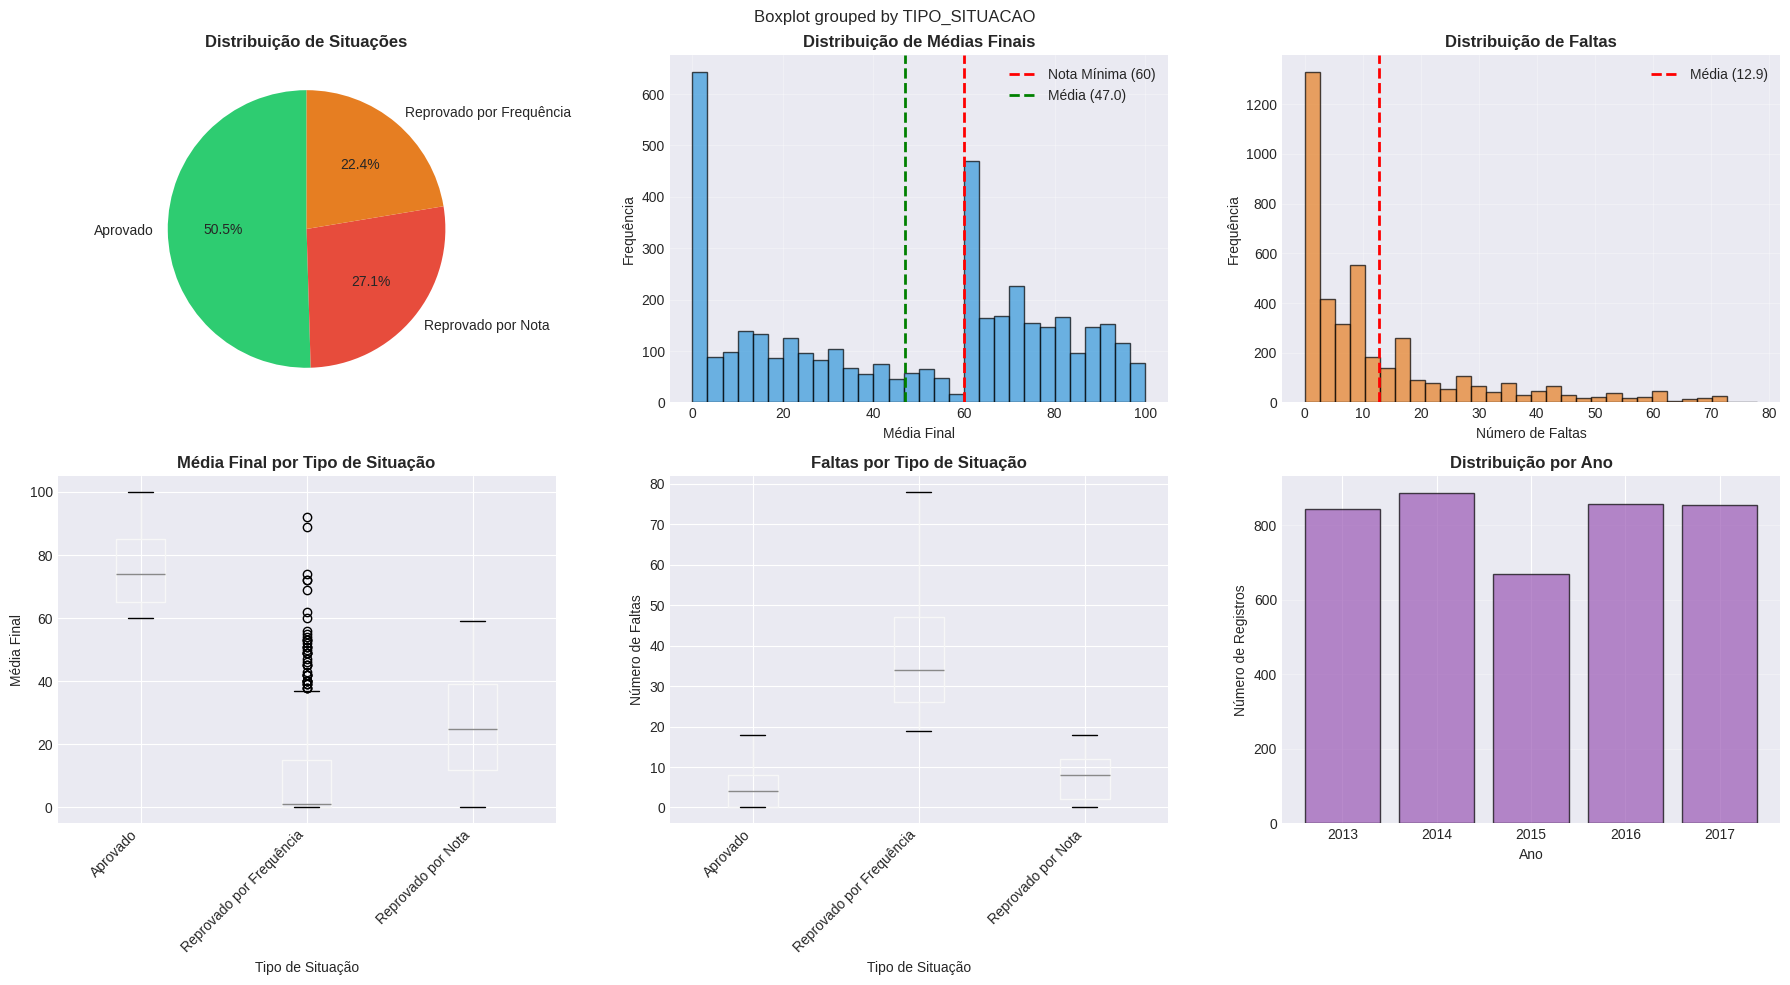

📊 ESTATÍSTICAS RESUMIDAS

📈 Média Final:
   - Média: 47.04
   - Mediana: 60.00
   - Desvio Padrão: 32.21

📊 Faltas:
   - Média: 12.87
   - Mediana: 7.00
   - Desvio Padrão: 15.76


In [7]:
# Criar figura com múltiplos subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Análise Exploratória - Distribuições', fontsize=16, fontweight='bold')

# 1. Distribuição de Situações
situacao_counts = df_normal['TIPO_SITUACAO'].value_counts()
colors_situacao = ['#2ecc71', '#e74c3c', '#e67e22']
axes[0, 0].pie(situacao_counts.values, labels=situacao_counts.index, autopct='%1.1f%%',
               colors=colors_situacao, startangle=90)
axes[0, 0].set_title('Distribuição de Situações', fontweight='bold')

# 2. Distribuição de Notas
axes[0, 1].hist(df_normal['MEDIA_FINAL'], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 1].axvline(60, color='red', linestyle='--', linewidth=2, label='Nota Mínima (60)')
axes[0, 1].axvline(df_normal['MEDIA_FINAL'].mean(), color='green', linestyle='--', 
                   linewidth=2, label=f'Média ({df_normal["MEDIA_FINAL"].mean():.1f})')
axes[0, 1].set_xlabel('Média Final')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Médias Finais', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribuição de Faltas
axes[0, 2].hist(df_normal['NUM_FALTAS'], bins=30, edgecolor='black', alpha=0.7, color='#e67e22')
axes[0, 2].axvline(df_normal['NUM_FALTAS'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Média ({df_normal["NUM_FALTAS"].mean():.1f})')
axes[0, 2].set_xlabel('Número de Faltas')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].set_title('Distribuição de Faltas', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Boxplot de Notas por Situação
df_normal.boxplot(column='MEDIA_FINAL', by='TIPO_SITUACAO', ax=axes[1, 0])
axes[1, 0].set_title('Média Final por Tipo de Situação', fontweight='bold')
axes[1, 0].set_xlabel('Tipo de Situação')
axes[1, 0].set_ylabel('Média Final')
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# 5. Boxplot de Faltas por Situação
df_normal.boxplot(column='NUM_FALTAS', by='TIPO_SITUACAO', ax=axes[1, 1])
axes[1, 1].set_title('Faltas por Tipo de Situação', fontweight='bold')
axes[1, 1].set_xlabel('Tipo de Situação')
axes[1, 1].set_ylabel('Número de Faltas')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right')

# 6. Distribuição por Ano
ano_counts = df_normal['ANO'].value_counts().sort_index()
axes[1, 2].bar(ano_counts.index, ano_counts.values, edgecolor='black', alpha=0.7, color='#9b59b6')
axes[1, 2].set_xlabel('Ano')
axes[1, 2].set_ylabel('Número de Registros')
axes[1, 2].set_title('Distribuição por Ano', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Estatísticas resumidas
print("="*70)
print("📊 ESTATÍSTICAS RESUMIDAS")
print("="*70)
print(f"\n📈 Média Final:")
print(f"   - Média: {df_normal['MEDIA_FINAL'].mean():.2f}")
print(f"   - Mediana: {df_normal['MEDIA_FINAL'].median():.2f}")
print(f"   - Desvio Padrão: {df_normal['MEDIA_FINAL'].std():.2f}")
print(f"\n📊 Faltas:")
print(f"   - Média: {df_normal['NUM_FALTAS'].mean():.2f}")
print(f"   - Mediana: {df_normal['NUM_FALTAS'].median():.2f}")
print(f"   - Desvio Padrão: {df_normal['NUM_FALTAS'].std():.2f}")

### 4.2 Análise por Disciplina

📚 ANÁLISE POR DISCIPLINA
            Total_Registros  Media_Nota  Media_Faltas  Taxa_Aprovacao
DISCIPLINA                                                           
2                      1071       39.09         15.89           38.00
5                       863       37.70         10.75           41.00
4                       831       43.22         14.22           44.00
3                       693       59.17         10.13           70.00
1                       657       64.30         11.94           72.00


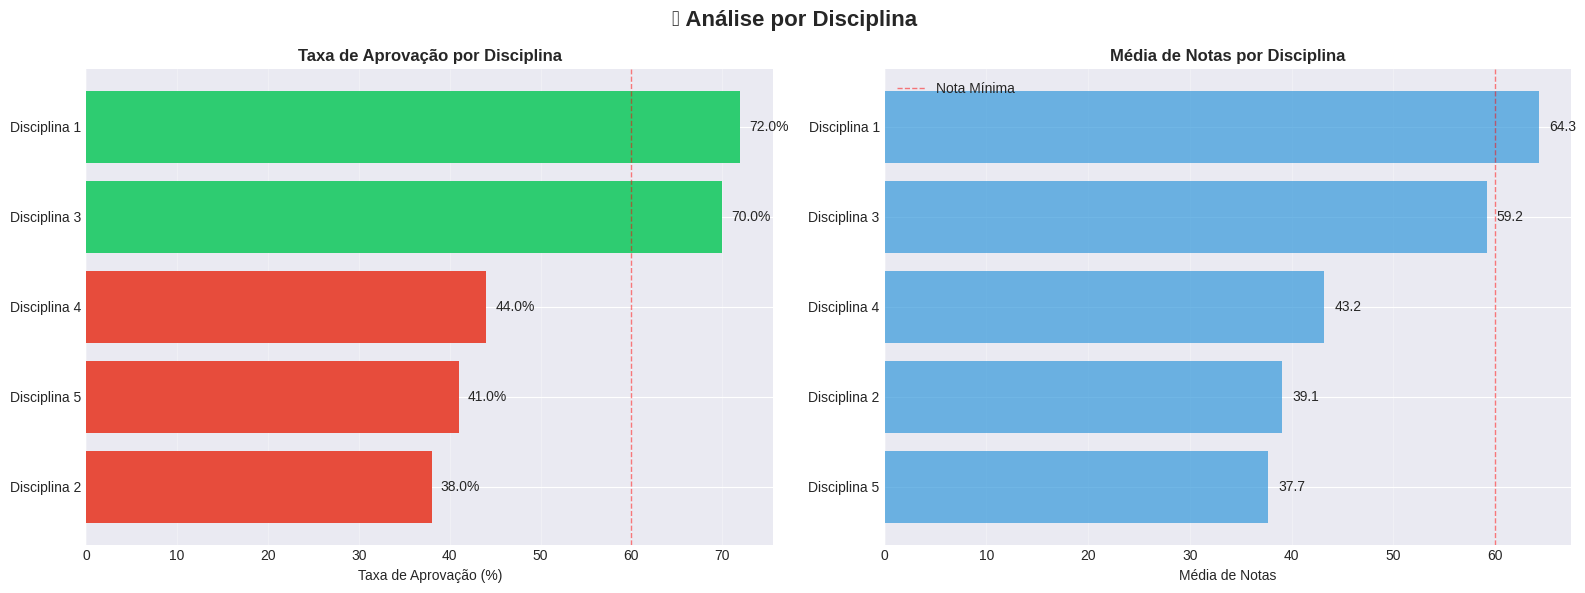

In [8]:
# Análise por disciplina
disciplina_stats = df_normal.groupby('DISCIPLINA').agg({
    'MATR_ALUNO': 'count',
    'MEDIA_FINAL': 'mean',
    'NUM_FALTAS': 'mean',
    'APROVADO': 'mean'
}).round(2)

disciplina_stats.columns = ['Total_Registros', 'Media_Nota', 'Media_Faltas', 'Taxa_Aprovacao']
disciplina_stats['Taxa_Aprovacao'] = (disciplina_stats['Taxa_Aprovacao'] * 100).round(1)
disciplina_stats = disciplina_stats.sort_values('Taxa_Aprovacao')

print("="*70)
print("📚 ANÁLISE POR DISCIPLINA")
print("="*70)
print(disciplina_stats)

# Gráfico de barras - Taxa de aprovação por disciplina
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📚 Análise por Disciplina', fontsize=16, fontweight='bold')

# Taxa de aprovação
colors = ['#e74c3c' if x < 50 else '#f39c12' if x < 70 else '#2ecc71' 
          for x in disciplina_stats['Taxa_Aprovacao']]
axes[0].barh(range(len(disciplina_stats)), disciplina_stats['Taxa_Aprovacao'], color=colors)
axes[0].set_yticks(range(len(disciplina_stats)))
axes[0].set_yticklabels([f'Disciplina {i}' for i in disciplina_stats.index])
axes[0].set_xlabel('Taxa de Aprovação (%)')
axes[0].set_title('Taxa de Aprovação por Disciplina', fontweight='bold')
axes[0].axvline(60, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(disciplina_stats['Taxa_Aprovacao']):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center')

# Média de nota por disciplina
disciplina_stats_sorted = disciplina_stats.sort_values('Media_Nota')
axes[1].barh(range(len(disciplina_stats_sorted)), disciplina_stats_sorted['Media_Nota'], 
             color='#3498db', alpha=0.7)
axes[1].set_yticks(range(len(disciplina_stats_sorted)))
axes[1].set_yticklabels([f'Disciplina {i}' for i in disciplina_stats_sorted.index])
axes[1].set_xlabel('Média de Notas')
axes[1].set_title('Média de Notas por Disciplina', fontweight='bold')
axes[1].axvline(60, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Nota Mínima')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].legend()

# Adicionar valores nas barras
for i, v in enumerate(disciplina_stats_sorted['Media_Nota']):
    axes[1].text(v + 1, i, f'{v:.1f}', va='center')

plt.tight_layout()
plt.show()

### 4.3 Análise Temporal

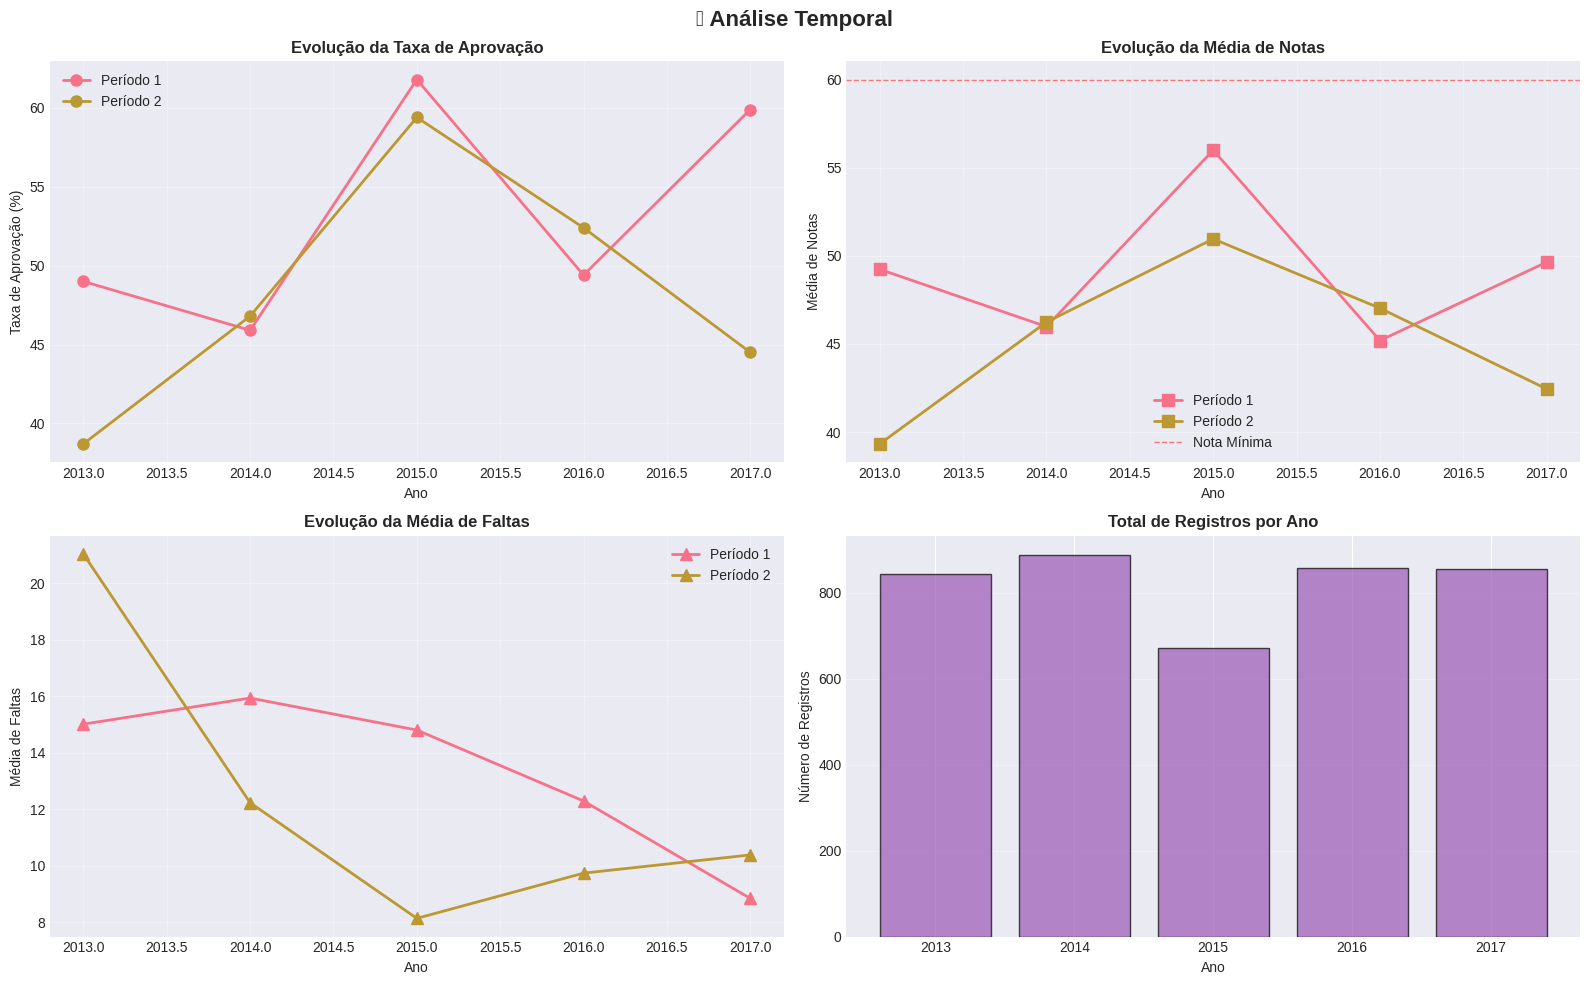

In [9]:
# Análise temporal
temporal_stats = df_normal.groupby(['ANO', 'PERIODO']).agg({
    'MATR_ALUNO': 'count',
    'APROVADO': 'mean',
    'MEDIA_FINAL': 'mean',
    'NUM_FALTAS': 'mean'
}).reset_index()

temporal_stats.columns = ['ANO', 'PERIODO', 'Total', 'Taxa_Aprovacao', 'Media_Nota', 'Media_Faltas']
temporal_stats['Taxa_Aprovacao'] = (temporal_stats['Taxa_Aprovacao'] * 100).round(1)

# Criar gráficos temporais
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📅 Análise Temporal', fontsize=16, fontweight='bold')

# Evolução da taxa de aprovação
for periodo in [1, 2]:
    dados_periodo = temporal_stats[temporal_stats['PERIODO'] == periodo]
    axes[0, 0].plot(dados_periodo['ANO'], dados_periodo['Taxa_Aprovacao'], 
                   marker='o', linewidth=2, markersize=8, label=f'Período {periodo}')

axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Taxa de Aprovação (%)')
axes[0, 0].set_title('Evolução da Taxa de Aprovação', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Evolução da média de notas
for periodo in [1, 2]:
    dados_periodo = temporal_stats[temporal_stats['PERIODO'] == periodo]
    axes[0, 1].plot(dados_periodo['ANO'], dados_periodo['Media_Nota'], 
                   marker='s', linewidth=2, markersize=8, label=f'Período {periodo}')

axes[0, 1].axhline(60, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Nota Mínima')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Média de Notas')
axes[0, 1].set_title('Evolução da Média de Notas', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Evolução de faltas
for periodo in [1, 2]:
    dados_periodo = temporal_stats[temporal_stats['PERIODO'] == periodo]
    axes[1, 0].plot(dados_periodo['ANO'], dados_periodo['Media_Faltas'], 
                   marker='^', linewidth=2, markersize=8, label=f'Período {periodo}')

axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Média de Faltas')
axes[1, 0].set_title('Evolução da Média de Faltas', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Total de registros por ano
registros_ano = df_normal.groupby('ANO').size()
axes[1, 1].bar(registros_ano.index, registros_ano.values, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Número de Registros')
axes[1, 1].set_title('Total de Registros por Ano', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 4.4 Análise de Correlação

🔗 ANÁLISE DE CORRELAÇÃO

📊 Matriz de Correlação:
             MEDIA_FINAL  NUM_FALTAS  DISCIPLINA   ANO  PERIODO  APROVADO
MEDIA_FINAL         1.00       -0.63       -0.18  0.01    -0.06      0.89
NUM_FALTAS         -0.63        1.00       -0.05 -0.18    -0.03     -0.53
DISCIPLINA         -0.18       -0.05        1.00 -0.01     0.05     -0.13
ANO                 0.01       -0.18       -0.01  1.00    -0.02      0.06
PERIODO            -0.06       -0.03        0.05 -0.02     1.00     -0.05
APROVADO            0.89       -0.53       -0.13  0.06    -0.05      1.00


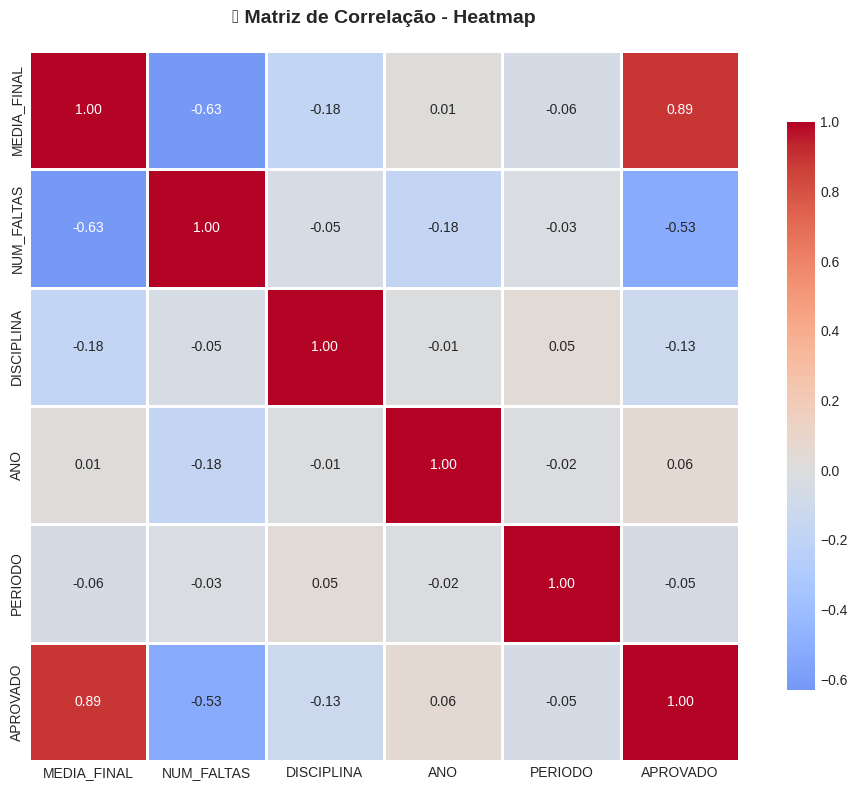


🎯 Principais Correlações:
   • MEDIA_FINAL vs NUM_FALTAS: -0.632
   • MEDIA_FINAL vs APROVADO: 0.886
   • NUM_FALTAS vs APROVADO: -0.526


In [10]:
# Calcular matriz de correlação
print("="*70)
print("🔗 ANÁLISE DE CORRELAÇÃO")
print("="*70)

# Selecionar apenas colunas numéricas
colunas_numericas = ['MEDIA_FINAL', 'NUM_FALTAS', 'DISCIPLINA', 'ANO', 'PERIODO', 'APROVADO']
correlation_matrix = df_normal[colunas_numericas].corr()

print("\n📊 Matriz de Correlação:")
print(correlation_matrix.round(3))

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('🔥 Matriz de Correlação - Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlações mais fortes
print("\n🎯 Principais Correlações:")
print(f"   • MEDIA_FINAL vs NUM_FALTAS: {correlation_matrix.loc['MEDIA_FINAL', 'NUM_FALTAS']:.3f}")
print(f"   • MEDIA_FINAL vs APROVADO: {correlation_matrix.loc['MEDIA_FINAL', 'APROVADO']:.3f}")
print(f"   • NUM_FALTAS vs APROVADO: {correlation_matrix.loc['NUM_FALTAS', 'APROVADO']:.3f}")

### 4.5 Gráfico de Dispersão (Scatter Plot)

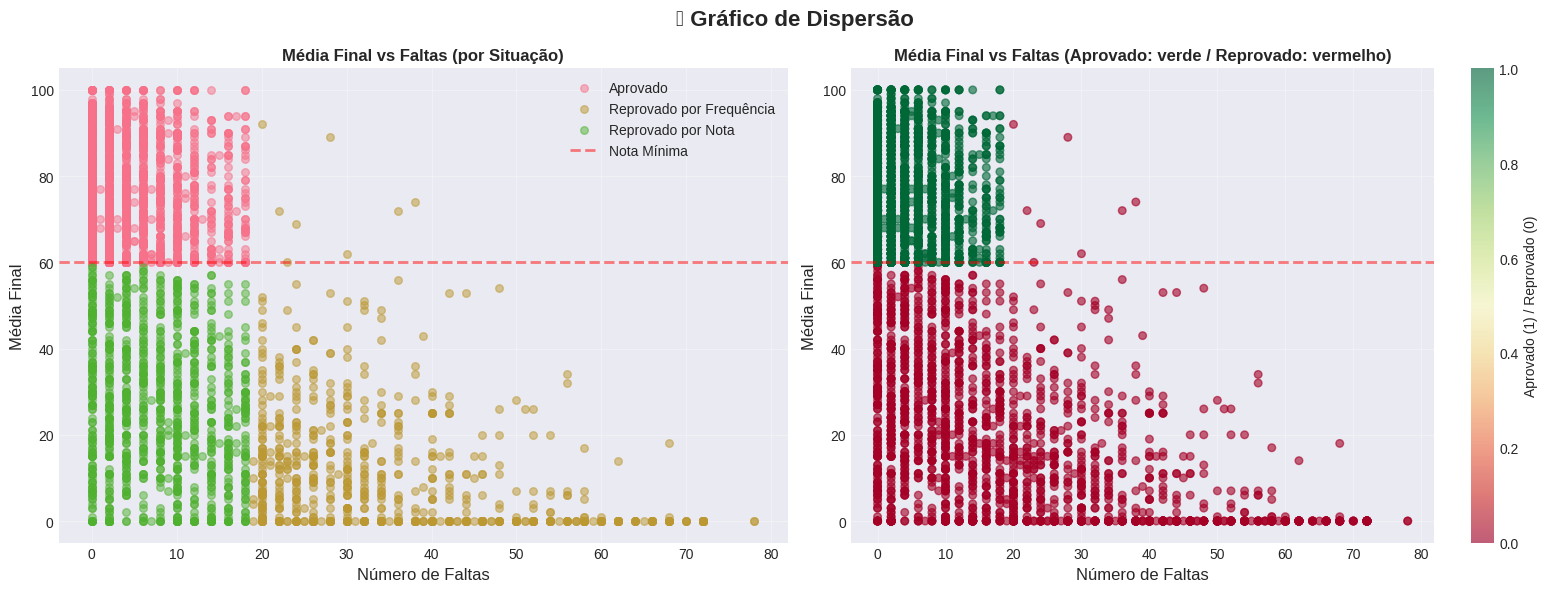

In [11]:
# Scatter plot - Nota vs Faltas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📍 Gráfico de Dispersão', fontsize=16, fontweight='bold')

# Plot 1: Por situação
for situacao in df_normal['TIPO_SITUACAO'].unique():
    dados = df_normal[df_normal['TIPO_SITUACAO'] == situacao]
    axes[0].scatter(dados['NUM_FALTAS'], dados['MEDIA_FINAL'], 
                   alpha=0.5, s=30, label=situacao)

axes[0].axhline(60, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Nota Mínima')
axes[0].set_xlabel('Número de Faltas', fontsize=12)
axes[0].set_ylabel('Média Final', fontsize=12)
axes[0].set_title('Média Final vs Faltas (por Situação)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Densidade
scatter = axes[1].scatter(df_normal['NUM_FALTAS'], df_normal['MEDIA_FINAL'], 
                         c=df_normal['APROVADO'], cmap='RdYlGn', alpha=0.6, s=30)
axes[1].axhline(60, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1].set_xlabel('Número de Faltas', fontsize=12)
axes[1].set_ylabel('Média Final', fontsize=12)
axes[1].set_title('Média Final vs Faltas (Aprovado: verde / Reprovado: vermelho)', fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='Aprovado (1) / Reprovado (0)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 5. Análise de Perfis de Alunos

In [12]:
# Criar perfis agregados por aluno
perfil_alunos = df_normal.groupby('MATR_ALUNO').agg({
    'MEDIA_FINAL': ['mean', 'std', 'min', 'max'],
    'NUM_FALTAS': ['mean', 'sum', 'max'],
    'APROVADO': ['mean', 'sum'],
    'DISCIPLINA': 'count'
}).reset_index()

# Renomear colunas
perfil_alunos.columns = ['MATR_ALUNO', 'media_nota_media', 'media_nota_std', 'nota_min', 'nota_max',
                         'faltas_media', 'faltas_total', 'faltas_max',
                         'taxa_aprovacao', 'total_aprovacoes', 'total_disciplinas']

# Criar categorias de desempenho
def categorizar_desempenho(taxa):
    if taxa >= 0.9:
        return 'Excelente'
    elif taxa >= 0.7:
        return 'Bom'
    elif taxa >= 0.5:
        return 'Regular'
    else:
        return 'Crítico'

perfil_alunos['categoria_desempenho'] = perfil_alunos['taxa_aprovacao'].apply(categorizar_desempenho)

print("="*70)
print("👥 PERFIL DOS ALUNOS")
print("="*70)
print(f"\n📊 Total de alunos únicos: {len(perfil_alunos)}")
print(f"\n📈 Distribuição por categoria de desempenho:")
print(perfil_alunos['categoria_desempenho'].value_counts())
print(f"\n📉 Estatísticas gerais:")
print(perfil_alunos[['media_nota_media', 'faltas_media', 'taxa_aprovacao', 'total_disciplinas']].describe())

👥 PERFIL DOS ALUNOS

📊 Total de alunos únicos: 781

📈 Distribuição por categoria de desempenho:
categoria_desempenho
Crítico      344
Excelente    260
Regular       94
Bom           83
Name: count, dtype: int64

📉 Estatísticas gerais:
       media_nota_media  faltas_media  taxa_aprovacao  total_disciplinas
count            781.00        781.00          781.00             781.00
mean              49.82         12.89            0.55               5.27
std               26.93         13.58            0.39               2.81
min                0.00          0.00            0.00               1.00
25%               28.80          3.20            0.20               4.00
50%               54.20          8.00            0.57               5.00
75%               72.67         18.00            1.00               7.00
max              100.00         72.00            1.00              20.00


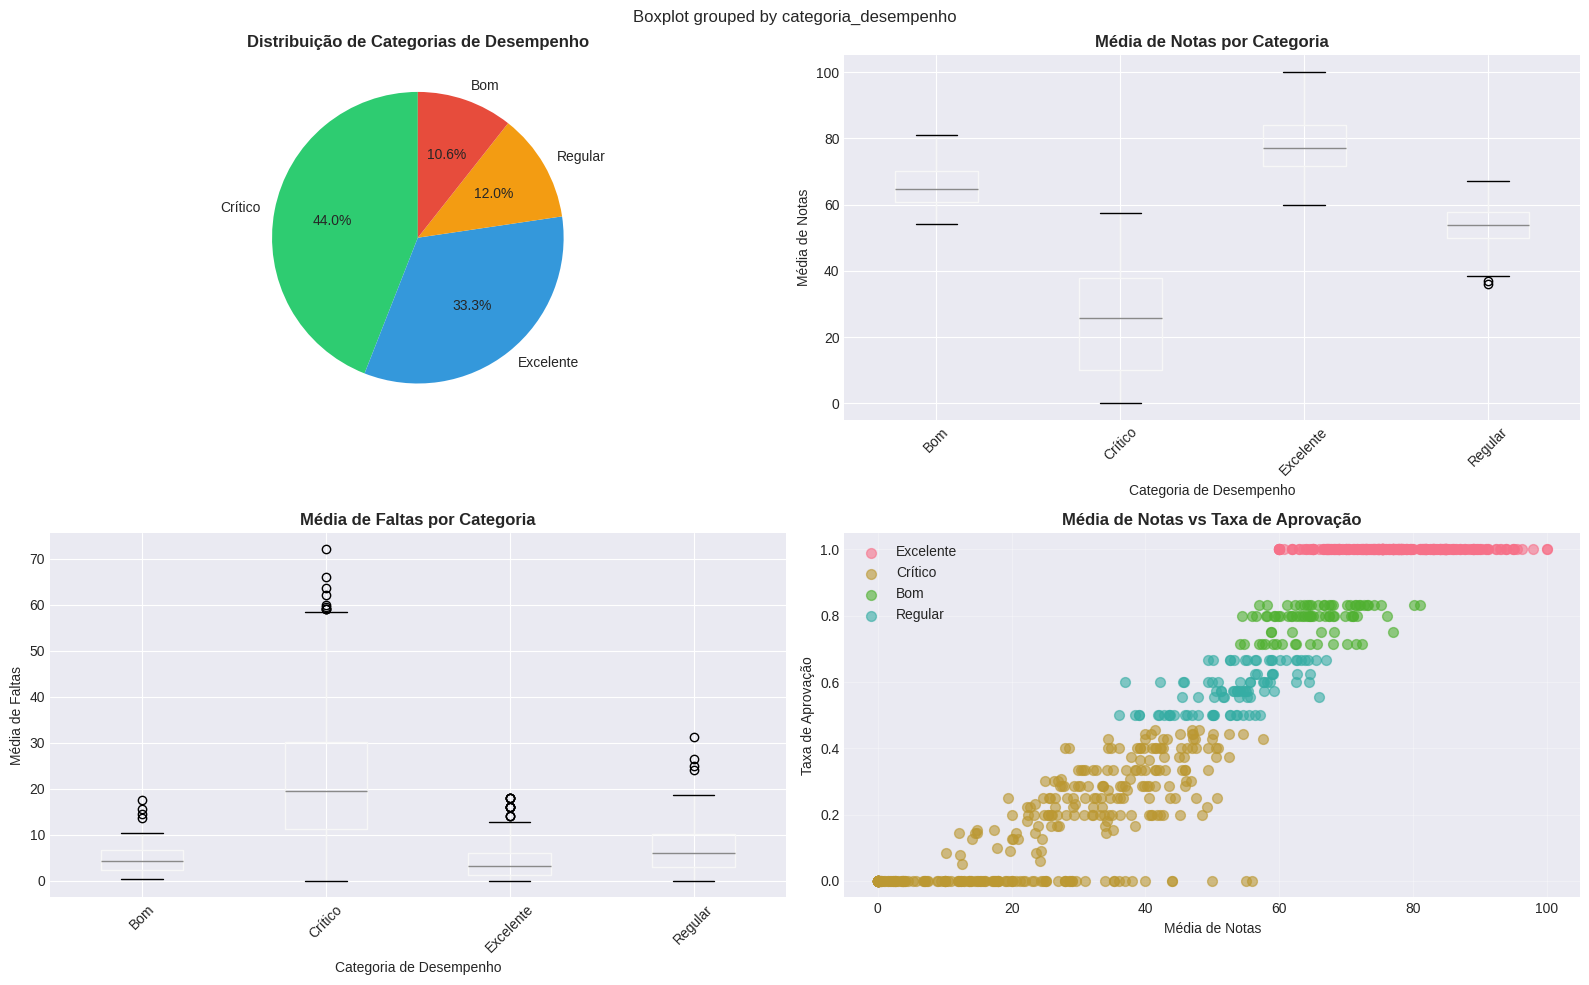

In [13]:
# Visualização dos perfis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('👥 Análise de Perfis de Alunos', fontsize=16, fontweight='bold')

# Distribuição de categorias
categoria_counts = perfil_alunos['categoria_desempenho'].value_counts()
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
axes[0, 0].pie(categoria_counts.values, labels=categoria_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[0, 0].set_title('Distribuição de Categorias de Desempenho', fontweight='bold')

# Média de notas por categoria
perfil_alunos.boxplot(column='media_nota_media', by='categoria_desempenho', ax=axes[0, 1])
axes[0, 1].set_title('Média de Notas por Categoria', fontweight='bold')
axes[0, 1].set_xlabel('Categoria de Desempenho')
axes[0, 1].set_ylabel('Média de Notas')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Média de faltas por categoria
perfil_alunos.boxplot(column='faltas_media', by='categoria_desempenho', ax=axes[1, 0])
axes[1, 0].set_title('Média de Faltas por Categoria', fontweight='bold')
axes[1, 0].set_xlabel('Categoria de Desempenho')
axes[1, 0].set_ylabel('Média de Faltas')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Scatter: Nota média vs Taxa de aprovação
for categoria in perfil_alunos['categoria_desempenho'].unique():
    dados = perfil_alunos[perfil_alunos['categoria_desempenho'] == categoria]
    axes[1, 1].scatter(dados['media_nota_media'], dados['taxa_aprovacao'], 
                      alpha=0.6, s=50, label=categoria)

axes[1, 1].set_xlabel('Média de Notas')
axes[1, 1].set_ylabel('Taxa de Aprovação')
axes[1, 1].set_title('Média de Notas vs Taxa de Aprovação', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🤖 6. MACHINE LEARNING - Preparação dos Dados

In [14]:
print("="*70)
print("🔧 PREPARAÇÃO DOS DADOS PARA MODELAGEM")
print("="*70)

# Criar dataset para modelagem
df_ml = df_normal.copy()

# Selecionar features
features = ['MEDIA_FINAL', 'NUM_FALTAS', 'DISCIPLINA', 'ANO', 'PERIODO']
target_class = 'APROVADO'
target_reg = 'MEDIA_FINAL'

print(f"\n✅ Features selecionadas: {features}")
print(f"✅ Target (classificação): {target_class}")
print(f"✅ Target (regressão): {target_reg}")
print(f"\n📊 Shape do dataset: {df_ml.shape}")
print(f"📊 Distribuição do target (classificação):")
print(df_ml[target_class].value_counts())
print(f"\n   Taxa de aprovação: {df_ml[target_class].mean()*100:.1f}%")

🔧 PREPARAÇÃO DOS DADOS PARA MODELAGEM

✅ Features selecionadas: ['MEDIA_FINAL', 'NUM_FALTAS', 'DISCIPLINA', 'ANO', 'PERIODO']
✅ Target (classificação): APROVADO
✅ Target (regressão): MEDIA_FINAL

📊 Shape do dataset: (4115, 12)
📊 Distribuição do target (classificação):
APROVADO
1    2077
0    2038
Name: count, dtype: int64

   Taxa de aprovação: 50.5%


## 🎯 7. MODELO 1: Classificação - Prever Aprovação/Reprovação

### 7.1 Preparação dos Dados para Classificação

In [15]:
# Separar features e target para classificação
# Nota: removemos MEDIA_FINAL das features pois queremos prever antes de ter a nota
X_class = df_ml[['NUM_FALTAS', 'DISCIPLINA', 'ANO', 'PERIODO']].copy()
y_class = df_ml['APROVADO'].copy()

# Split treino/teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.25, random_state=42, stratify=y_class
)

# Normalização
scaler_class = StandardScaler()
X_train_c_scaled = scaler_class.fit_transform(X_train_c)
X_test_c_scaled = scaler_class.transform(X_test_c)

print("="*70)
print("📊 DADOS PREPARADOS PARA CLASSIFICAÇÃO")
print("="*70)
print(f"\n✅ Treino: {X_train_c.shape[0]} amostras")
print(f"✅ Teste: {X_test_c.shape[0]} amostras")
print(f"\n📊 Distribuição no treino:")
print(y_train_c.value_counts())
print(f"\n📊 Distribuição no teste:")
print(y_test_c.value_counts())

📊 DADOS PREPARADOS PARA CLASSIFICAÇÃO

✅ Treino: 3086 amostras
✅ Teste: 1029 amostras

📊 Distribuição no treino:
APROVADO
1    1558
0    1528
Name: count, dtype: int64

📊 Distribuição no teste:
APROVADO
1    519
0    510
Name: count, dtype: int64


### 7.2 Treinamento dos Modelos de Classificação

In [16]:
# Dicionário para armazenar modelos e resultados
modelos_class = {}
resultados_class = {}

print("="*70)
print("🚀 TREINAMENTO DOS MODELOS DE CLASSIFICAÇÃO")
print("="*70)

# 1. REGRESSÃO LOGÍSTICA
print("\n🔹 1/4 - Treinando Regressão Logística...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_c_scaled, y_train_c)
y_pred_lr = lr.predict(X_test_c_scaled)
modelos_class['Logistic Regression'] = lr
resultados_class['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test_c, y_pred_lr),
    'precision': precision_score(y_test_c, y_pred_lr),
    'recall': recall_score(y_test_c, y_pred_lr),
    'f1': f1_score(y_test_c, y_pred_lr)
}
print(f"   ✅ Acurácia: {resultados_class['Logistic Regression']['accuracy']:.4f}")

# 2. SVM LINEAR
print("\n🔹 2/4 - Treinando SVM Linear...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_c_scaled, y_train_c)
y_pred_svm_linear = svm_linear.predict(X_test_c_scaled)
modelos_class['SVM Linear'] = svm_linear
resultados_class['SVM Linear'] = {
    'accuracy': accuracy_score(y_test_c, y_pred_svm_linear),
    'precision': precision_score(y_test_c, y_pred_svm_linear),
    'recall': recall_score(y_test_c, y_pred_svm_linear),
    'f1': f1_score(y_test_c, y_pred_svm_linear)
}
print(f"   ✅ Acurácia: {resultados_class['SVM Linear']['accuracy']:.4f}")

# 3. SVM RBF
print("\n🔹 3/4 - Treinando SVM RBF...")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_c_scaled, y_train_c)
y_pred_svm_rbf = svm_rbf.predict(X_test_c_scaled)
modelos_class['SVM RBF'] = svm_rbf
resultados_class['SVM RBF'] = {
    'accuracy': accuracy_score(y_test_c, y_pred_svm_rbf),
    'precision': precision_score(y_test_c, y_pred_svm_rbf),
    'recall': recall_score(y_test_c, y_pred_svm_rbf),
    'f1': f1_score(y_test_c, y_pred_svm_rbf)
}
print(f"   ✅ Acurácia: {resultados_class['SVM RBF']['accuracy']:.4f}")

# 4. REDE NEURAL MLP
print("\n🔹 4/4 - Treinando Rede Neural MLP...")
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42, early_stopping=True)
mlp.fit(X_train_c_scaled, y_train_c)
y_pred_mlp = mlp.predict(X_test_c_scaled)
modelos_class['MLP Neural Network'] = mlp
resultados_class['MLP Neural Network'] = {
    'accuracy': accuracy_score(y_test_c, y_pred_mlp),
    'precision': precision_score(y_test_c, y_pred_mlp),
    'recall': recall_score(y_test_c, y_pred_mlp),
    'f1': f1_score(y_test_c, y_pred_mlp)
}
print(f"   ✅ Acurácia: {resultados_class['MLP Neural Network']['accuracy']:.4f}")

print("\n✅ Todos os modelos treinados com sucesso!")

🚀 TREINAMENTO DOS MODELOS DE CLASSIFICAÇÃO

🔹 1/4 - Treinando Regressão Logística...
   ✅ Acurácia: 0.7969

🔹 2/4 - Treinando SVM Linear...
   ✅ Acurácia: 0.7949

🔹 3/4 - Treinando SVM RBF...
   ✅ Acurácia: 0.8017

🔹 4/4 - Treinando Rede Neural MLP...
   ✅ Acurácia: 0.4956

✅ Todos os modelos treinados com sucesso!


### 7.3 Comparação dos Modelos de Classificação

📊 COMPARAÇÃO DOS MODELOS DE CLASSIFICAÇÃO
                     accuracy  precision  recall   f1
SVM RBF                  0.80       0.75    0.91 0.82
Logistic Regression      0.80       0.76    0.86 0.81
SVM Linear               0.79       0.75    0.89 0.81
MLP Neural Network       0.50       0.00    0.00 0.00


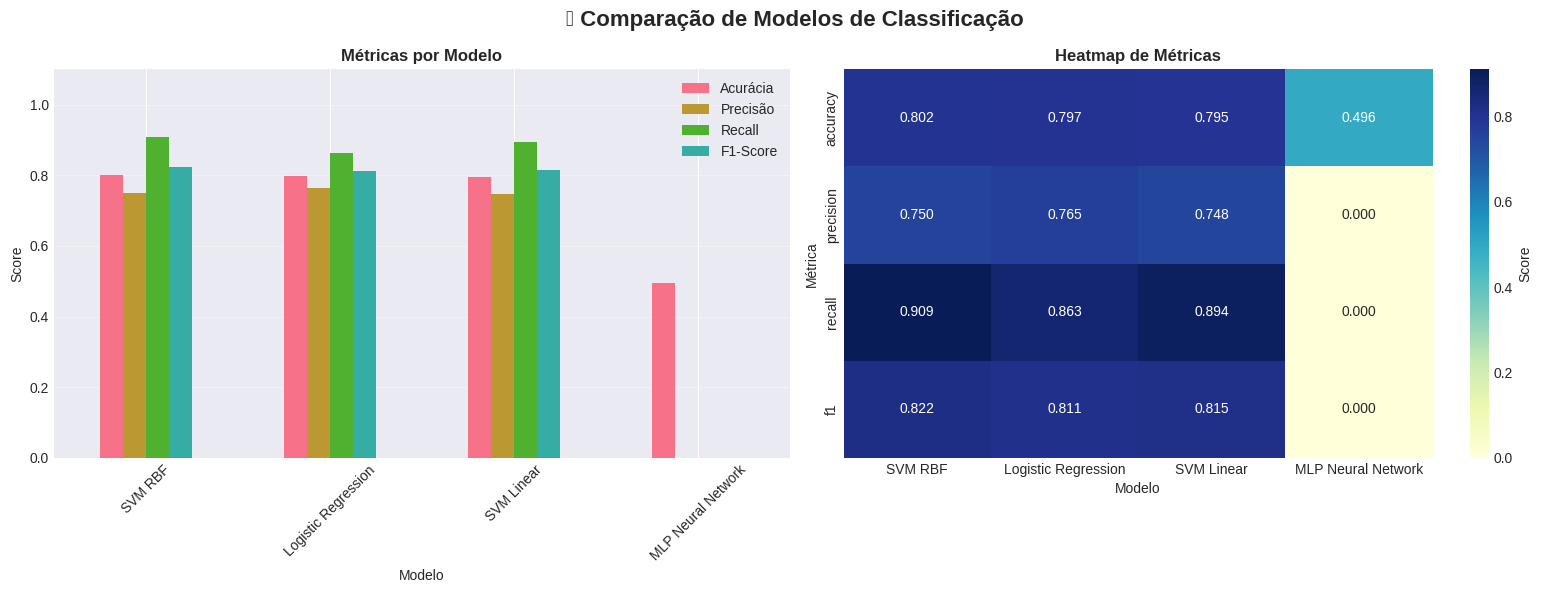


🏆 Melhor modelo: SVM RBF
   Acurácia: 0.8017


In [17]:
# Criar DataFrame com resultados
df_resultados_class = pd.DataFrame(resultados_class).T
df_resultados_class = df_resultados_class.sort_values('accuracy', ascending=False)

print("="*70)
print("📊 COMPARAÇÃO DOS MODELOS DE CLASSIFICAÇÃO")
print("="*70)
print(df_resultados_class.round(4))

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Comparação de Modelos de Classificação', fontsize=16, fontweight='bold')

# Gráfico de barras com todas as métricas
df_resultados_class.plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Métricas por Modelo', fontweight='bold')
axes[0].set_xlabel('Modelo')
axes[0].set_ylabel('Score')
axes[0].legend(['Acurácia', 'Precisão', 'Recall', 'F1-Score'])
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

# Heatmap das métricas
sns.heatmap(df_resultados_class.T, annot=True, fmt='.3f', cmap='YlGnBu', 
            ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Heatmap de Métricas', fontweight='bold')
axes[1].set_xlabel('Modelo')
axes[1].set_ylabel('Métrica')

plt.tight_layout()
plt.show()

# Melhor modelo
melhor_modelo_class = df_resultados_class.index[0]
print(f"\n🏆 Melhor modelo: {melhor_modelo_class}")
print(f"   Acurácia: {df_resultados_class.loc[melhor_modelo_class, 'accuracy']:.4f}")

### 7.4 Matriz de Confusão do Melhor Modelo

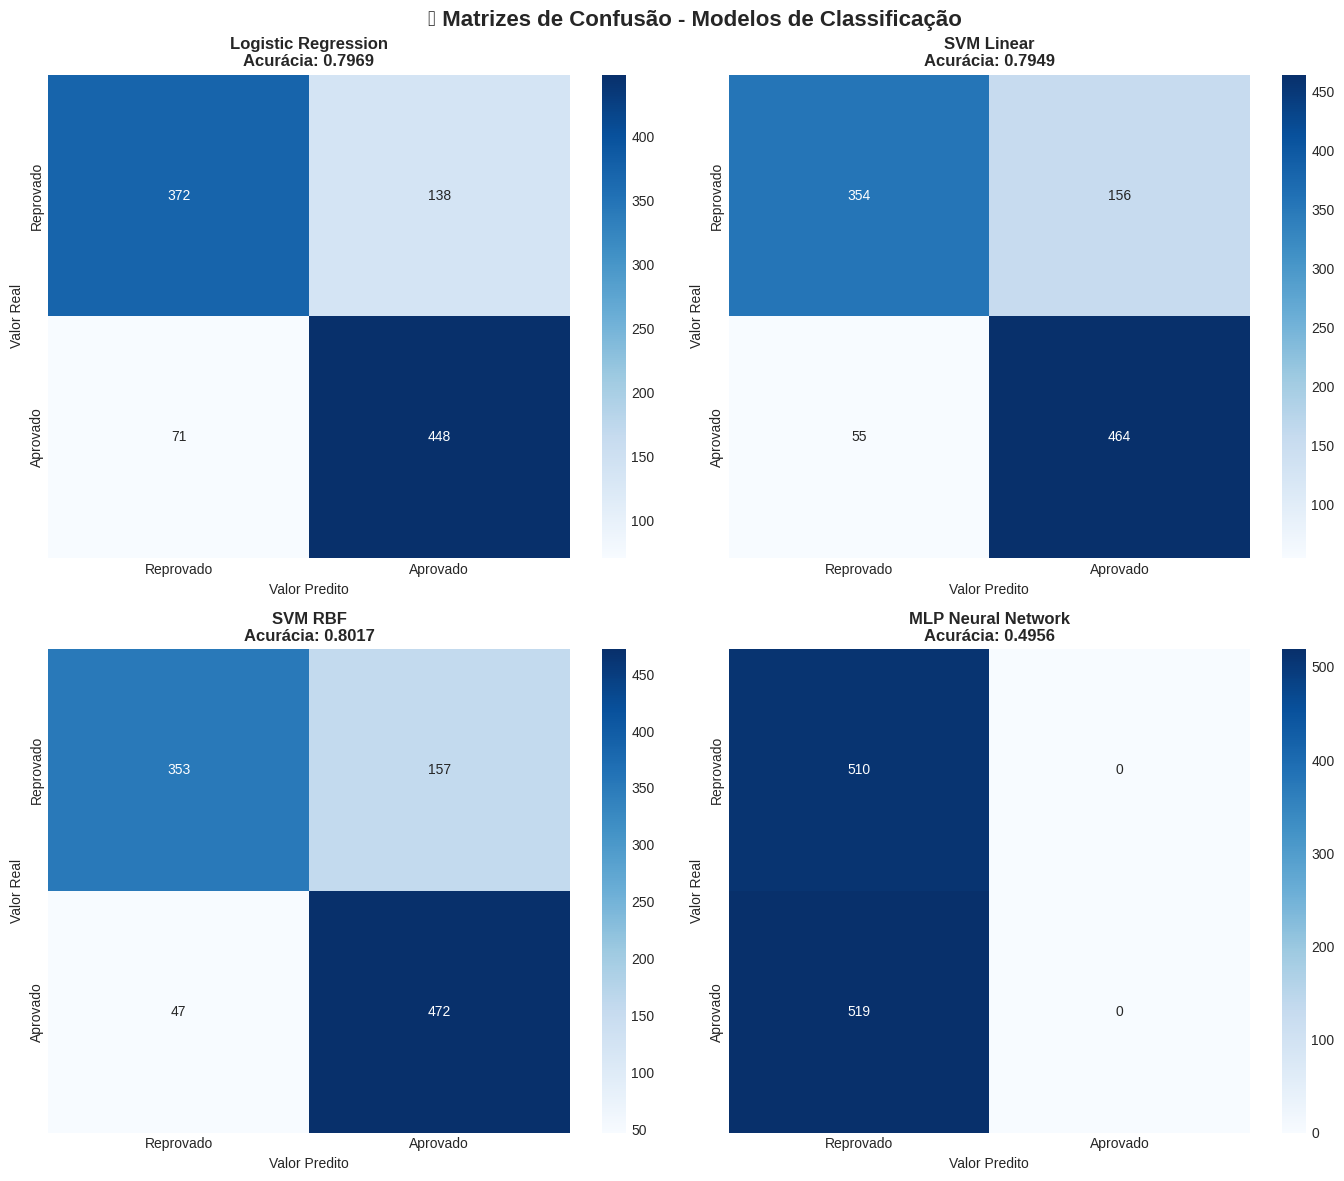

In [18]:
# Matriz de confusão para todos os modelos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('🎯 Matrizes de Confusão - Modelos de Classificação', fontsize=16, fontweight='bold')

predictions = {
    'Logistic Regression': y_pred_lr,
    'SVM Linear': y_pred_svm_linear,
    'SVM RBF': y_pred_svm_rbf,
    'MLP Neural Network': y_pred_mlp
}

for idx, (nome, pred) in enumerate(predictions.items()):
    ax = axes[idx // 2, idx % 2]
    cm = confusion_matrix(y_test_c, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                xticklabels=['Reprovado', 'Aprovado'],
                yticklabels=['Reprovado', 'Aprovado'])
    ax.set_title(f'{nome}\nAcurácia: {resultados_class[nome]["accuracy"]:.4f}', fontweight='bold')
    ax.set_ylabel('Valor Real')
    ax.set_xlabel('Valor Predito')

plt.tight_layout()
plt.show()

## 📈 8. MODELO 2: Regressão - Prever Média Final

### 8.1 Preparação dos Dados para Regressão

In [19]:
# Separar features e target para regressão
X_reg = df_ml[['NUM_FALTAS', 'DISCIPLINA', 'ANO', 'PERIODO']].copy()
y_reg = df_ml['MEDIA_FINAL'].copy()

# Split treino/teste
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Normalização
scaler_reg = StandardScaler()
X_train_r_scaled = scaler_reg.fit_transform(X_train_r)
X_test_r_scaled = scaler_reg.transform(X_test_r)

print("="*70)
print("📊 DADOS PREPARADOS PARA REGRESSÃO")
print("="*70)
print(f"\n✅ Treino: {X_train_r.shape[0]} amostras")
print(f"✅ Teste: {X_test_r.shape[0]} amostras")
print(f"\n📊 Estatísticas do target (MEDIA_FINAL):")
print(f"   Média: {y_reg.mean():.2f}")
print(f"   Desvio Padrão: {y_reg.std():.2f}")
print(f"   Mínimo: {y_reg.min():.2f}")
print(f"   Máximo: {y_reg.max():.2f}")

📊 DADOS PREPARADOS PARA REGRESSÃO

✅ Treino: 3086 amostras
✅ Teste: 1029 amostras

📊 Estatísticas do target (MEDIA_FINAL):
   Média: 47.04
   Desvio Padrão: 32.21
   Mínimo: 0.00
   Máximo: 100.00


### 8.2 Treinamento dos Modelos de Regressão

In [20]:
# Dicionário para armazenar modelos e resultados
modelos_reg = {}
resultados_reg = {}

print("="*70)
print("🚀 TREINAMENTO DOS MODELOS DE REGRESSÃO")
print("="*70)

# 1. REGRESSÃO LINEAR
print("\n🔹 1/4 - Treinando Regressão Linear...")
lin_reg = LinearRegression()
lin_reg.fit(X_train_r_scaled, y_train_r)
y_pred_lin = lin_reg.predict(X_test_r_scaled)
modelos_reg['Linear Regression'] = lin_reg
resultados_reg['Linear Regression'] = {
    'R²': r2_score(y_test_r, y_pred_lin),
    'RMSE': np.sqrt(mean_squared_error(y_test_r, y_pred_lin)),
    'MAE': mean_absolute_error(y_test_r, y_pred_lin)
}
print(f"   ✅ R²: {resultados_reg['Linear Regression']['R²']:.4f}")
print(f"   ✅ RMSE: {resultados_reg['Linear Regression']['RMSE']:.4f}")

# 2. RIDGE REGRESSION (Regularização L2)
print("\n🔹 2/4 - Treinando Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_r_scaled, y_train_r)
y_pred_ridge = ridge.predict(X_test_r_scaled)
modelos_reg['Ridge Regression'] = ridge
resultados_reg['Ridge Regression'] = {
    'R²': r2_score(y_test_r, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test_r, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test_r, y_pred_ridge)
}
print(f"   ✅ R²: {resultados_reg['Ridge Regression']['R²']:.4f}")
print(f"   ✅ RMSE: {resultados_reg['Ridge Regression']['RMSE']:.4f}")

# 3. SVR (Support Vector Regression)
print("\n🔹 3/4 - Treinando SVR...")
svr = SVR(kernel='rbf')
svr.fit(X_train_r_scaled, y_train_r)
y_pred_svr = svr.predict(X_test_r_scaled)
modelos_reg['SVR'] = svr
resultados_reg['SVR'] = {
    'R²': r2_score(y_test_r, y_pred_svr),
    'RMSE': np.sqrt(mean_squared_error(y_test_r, y_pred_svr)),
    'MAE': mean_absolute_error(y_test_r, y_pred_svr)
}
print(f"   ✅ R²: {resultados_reg['SVR']['R²']:.4f}")
print(f"   ✅ RMSE: {resultados_reg['SVR']['RMSE']:.4f}")

# 4. MLP REGRESSOR
print("\n🔹 4/4 - Treinando MLP Regressor...")
mlp_reg = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42, early_stopping=True)
mlp_reg.fit(X_train_r_scaled, y_train_r)
y_pred_mlp_reg = mlp_reg.predict(X_test_r_scaled)
modelos_reg['MLP Regressor'] = mlp_reg
resultados_reg['MLP Regressor'] = {
    'R²': r2_score(y_test_r, y_pred_mlp_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_r, y_pred_mlp_reg)),
    'MAE': mean_absolute_error(y_test_r, y_pred_mlp_reg)
}
print(f"   ✅ R²: {resultados_reg['MLP Regressor']['R²']:.4f}")
print(f"   ✅ RMSE: {resultados_reg['MLP Regressor']['RMSE']:.4f}")

print("\n✅ Todos os modelos de regressão treinados com sucesso!")

🚀 TREINAMENTO DOS MODELOS DE REGRESSÃO

🔹 1/4 - Treinando Regressão Linear...
   ✅ R²: 0.4909
   ✅ RMSE: 23.1583

🔹 2/4 - Treinando Ridge Regression...
   ✅ R²: 0.4909
   ✅ RMSE: 23.1585

🔹 3/4 - Treinando SVR...
   ✅ R²: 0.5486
   ✅ RMSE: 21.8060

🔹 4/4 - Treinando MLP Regressor...
   ✅ R²: 0.5709
   ✅ RMSE: 21.2621

✅ Todos os modelos de regressão treinados com sucesso!


### 8.3 Comparação dos Modelos de Regressão

📊 COMPARAÇÃO DOS MODELOS DE REGRESSÃO
                    R²  RMSE   MAE
MLP Regressor     0.57 21.26 16.63
SVR               0.55 21.81 16.92
Linear Regression 0.49 23.16 19.25
Ridge Regression  0.49 23.16 19.25


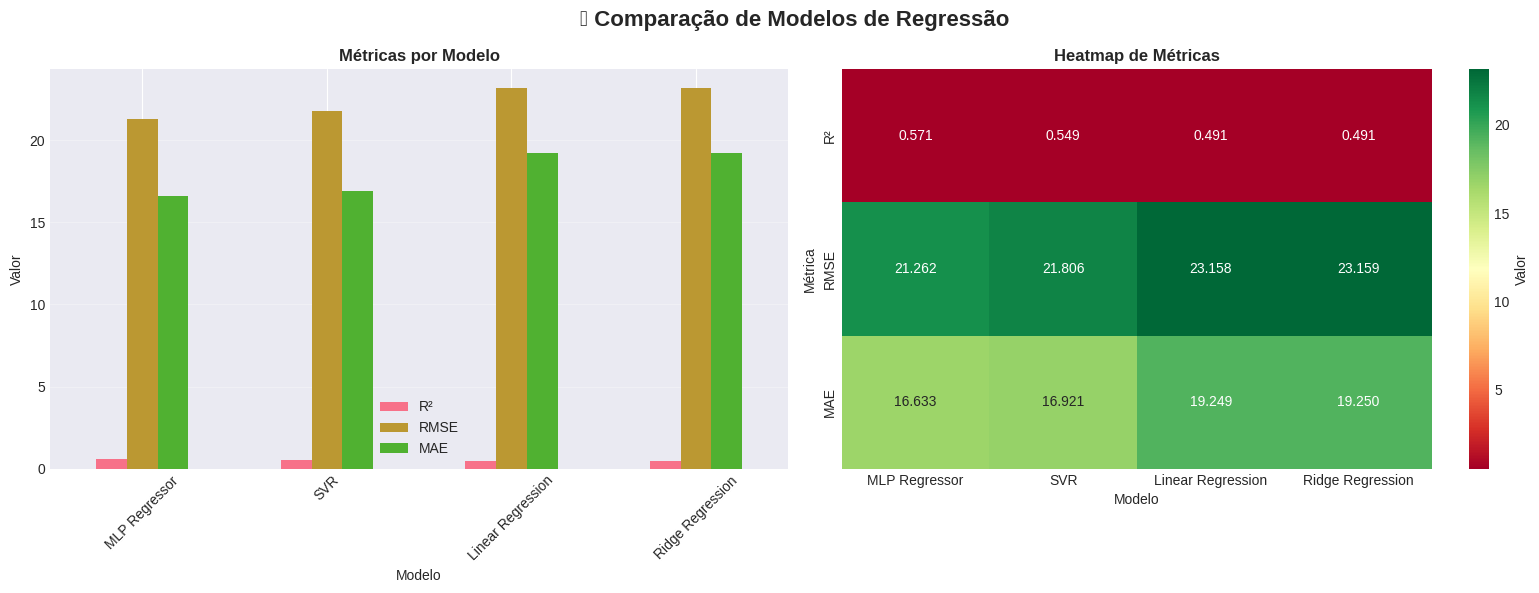


🏆 Melhor modelo: MLP Regressor
   R²: 0.5709
   RMSE: 21.2621


In [21]:
# Criar DataFrame com resultados
df_resultados_reg = pd.DataFrame(resultados_reg).T
df_resultados_reg = df_resultados_reg.sort_values('R²', ascending=False)

print("="*70)
print("📊 COMPARAÇÃO DOS MODELOS DE REGRESSÃO")
print("="*70)
print(df_resultados_reg.round(4))

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📈 Comparação de Modelos de Regressão', fontsize=16, fontweight='bold')

# Gráfico de barras
df_resultados_reg.plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Métricas por Modelo', fontweight='bold')
axes[0].set_xlabel('Modelo')
axes[0].set_ylabel('Valor')
axes[0].legend(['R²', 'RMSE', 'MAE'])
axes[0].grid(True, alpha=0.3, axis='y')

# Heatmap das métricas
sns.heatmap(df_resultados_reg.T, annot=True, fmt='.3f', cmap='RdYlGn', 
            ax=axes[1], cbar_kws={'label': 'Valor'})
axes[1].set_title('Heatmap de Métricas', fontweight='bold')
axes[1].set_xlabel('Modelo')
axes[1].set_ylabel('Métrica')

plt.tight_layout()
plt.show()

# Melhor modelo
melhor_modelo_reg = df_resultados_reg.index[0]
print(f"\n🏆 Melhor modelo: {melhor_modelo_reg}")
print(f"   R²: {df_resultados_reg.loc[melhor_modelo_reg, 'R²']:.4f}")
print(f"   RMSE: {df_resultados_reg.loc[melhor_modelo_reg, 'RMSE']:.4f}")

### 8.4 Análise de Resíduos

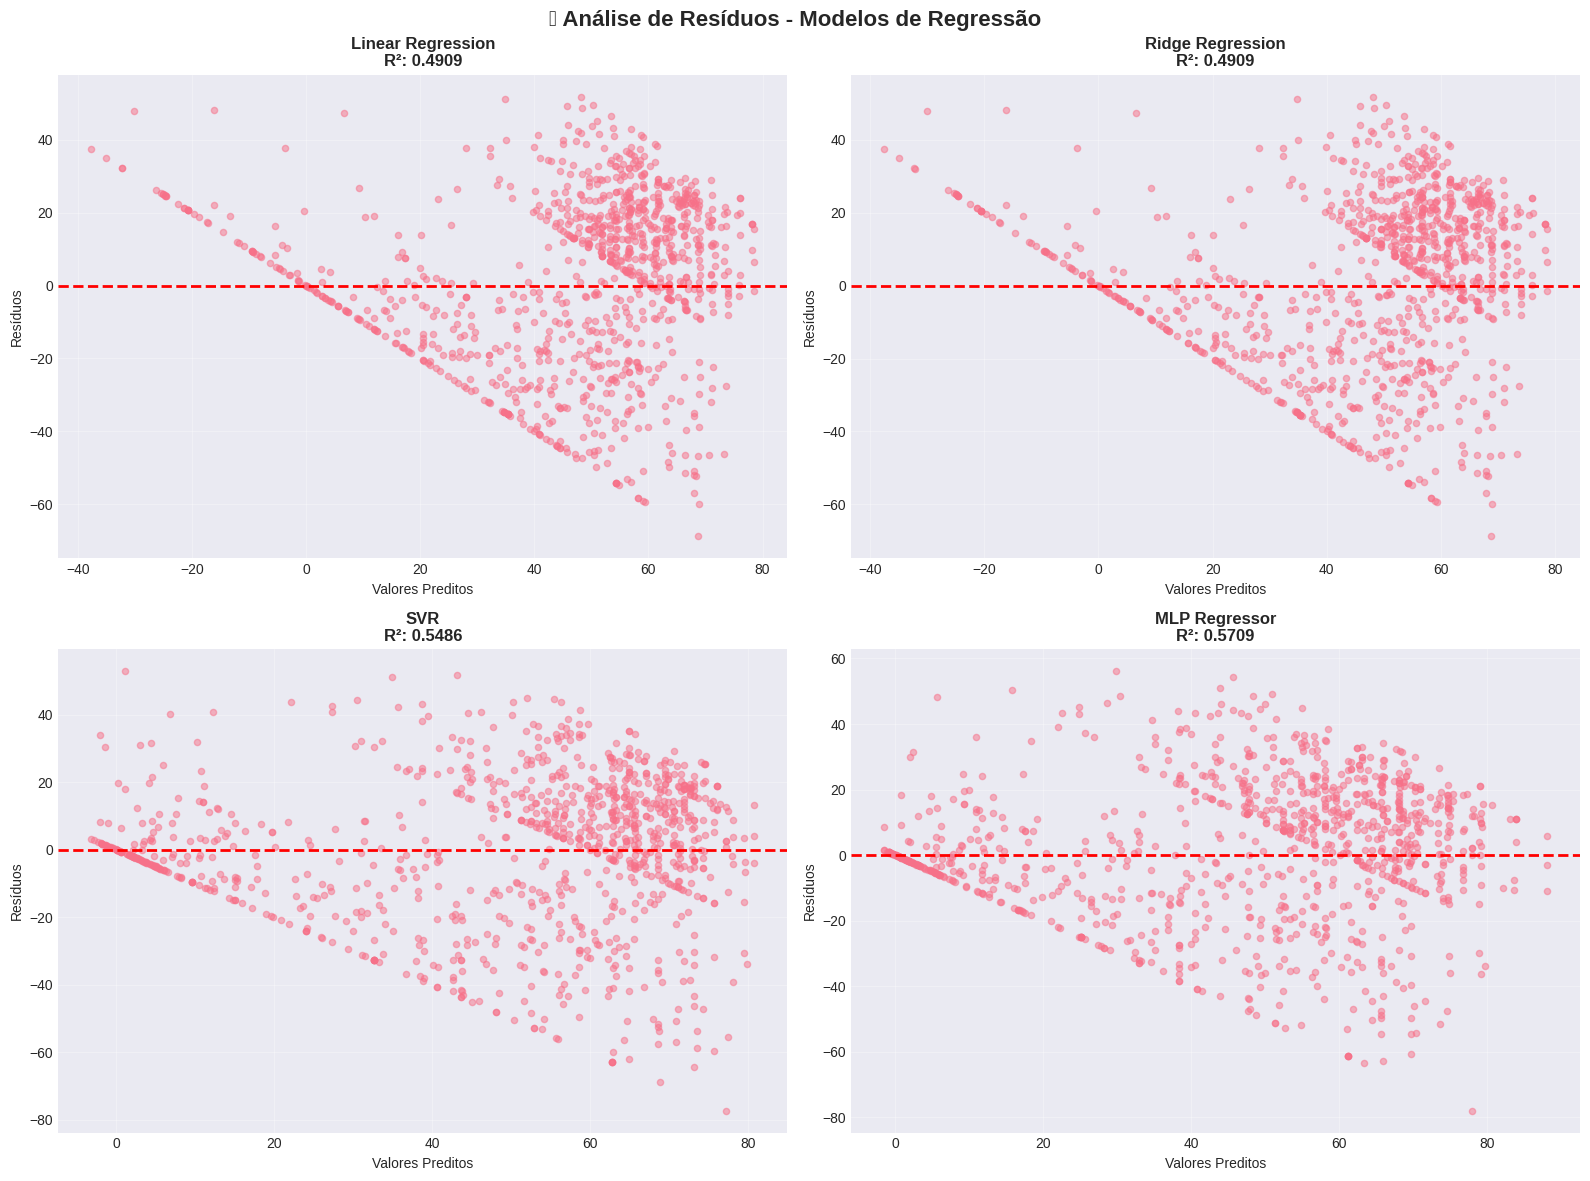

In [22]:
# Análise de resíduos para todos os modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📉 Análise de Resíduos - Modelos de Regressão', fontsize=16, fontweight='bold')

predictions_reg = {
    'Linear Regression': y_pred_lin,
    'Ridge Regression': y_pred_ridge,
    'SVR': y_pred_svr,
    'MLP Regressor': y_pred_mlp_reg
}

for idx, (nome, pred) in enumerate(predictions_reg.items()):
    ax = axes[idx // 2, idx % 2]
    residuos = y_test_r - pred
    
    # Scatter plot: Valores Preditos vs Resíduos
    ax.scatter(pred, residuos, alpha=0.5, s=20)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Valores Preditos')
    ax.set_ylabel('Resíduos')
    ax.set_title(f'{nome}\nR²: {resultados_reg[nome]["R²"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8.5 Predito vs Real

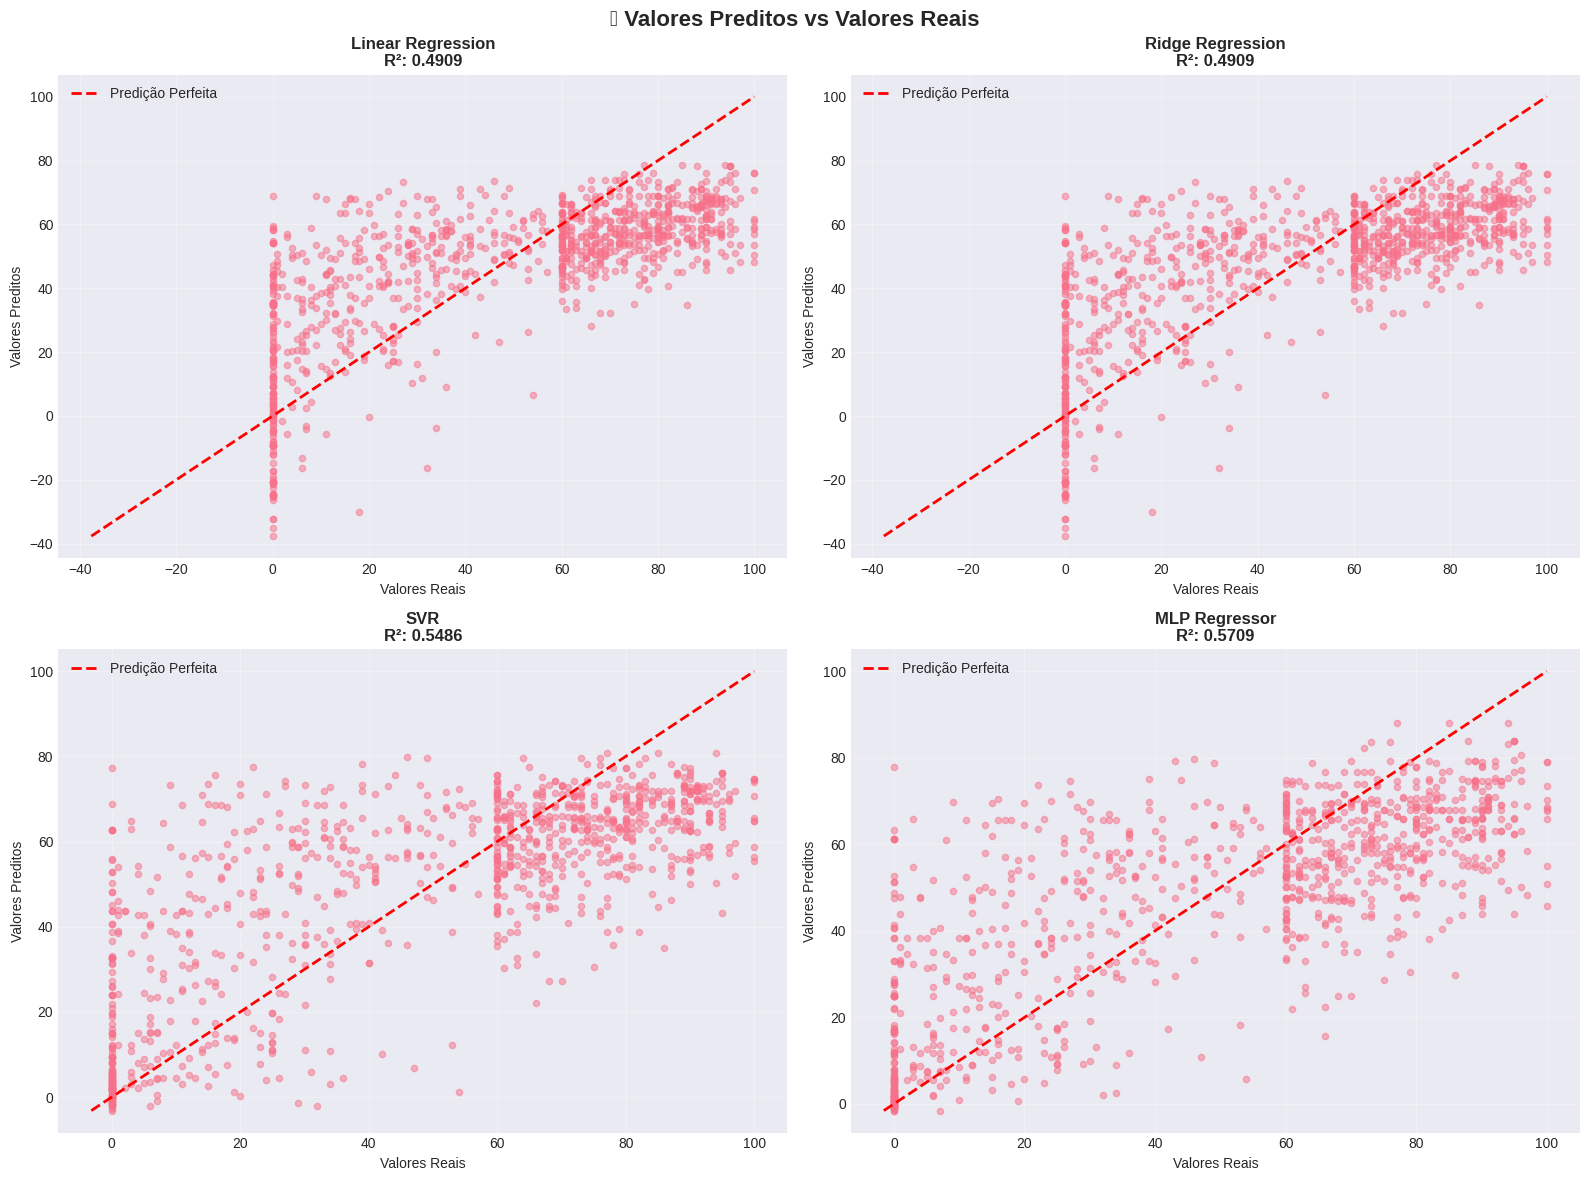

In [23]:
# Gráfico Predito vs Real
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎯 Valores Preditos vs Valores Reais', fontsize=16, fontweight='bold')

for idx, (nome, pred) in enumerate(predictions_reg.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Scatter plot
    ax.scatter(y_test_r, pred, alpha=0.5, s=20)
    
    # Linha ideal (y = x)
    min_val = min(y_test_r.min(), pred.min())
    max_val = max(y_test_r.max(), pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')
    
    ax.set_xlabel('Valores Reais')
    ax.set_ylabel('Valores Preditos')
    ax.set_title(f'{nome}\nR²: {resultados_reg[nome]["R²"]:.4f}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 9. MODELO 3: Clustering - Identificar Perfis de Alunos

### 9.1 Preparação dos Dados para Clustering

In [24]:
# Usar o perfil agregado por aluno criado anteriormente
# Selecionar features para clustering
features_cluster = ['media_nota_media', 'faltas_media', 'taxa_aprovacao', 'total_disciplinas']
X_cluster = perfil_alunos[features_cluster].copy()

# Normalização é crucial para clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("="*70)
print("📊 DADOS PREPARADOS PARA CLUSTERING")
print("="*70)
print(f"\n✅ Total de alunos: {X_cluster.shape[0]}")
print(f"✅ Features: {features_cluster}")
print(f"\n📊 Estatísticas das features:")
print(X_cluster.describe())

📊 DADOS PREPARADOS PARA CLUSTERING

✅ Total de alunos: 781
✅ Features: ['media_nota_media', 'faltas_media', 'taxa_aprovacao', 'total_disciplinas']

📊 Estatísticas das features:
       media_nota_media  faltas_media  taxa_aprovacao  total_disciplinas
count            781.00        781.00          781.00             781.00
mean              49.82         12.89            0.55               5.27
std               26.93         13.58            0.39               2.81
min                0.00          0.00            0.00               1.00
25%               28.80          3.20            0.20               4.00
50%               54.20          8.00            0.57               5.00
75%               72.67         18.00            1.00               7.00
max              100.00         72.00            1.00              20.00


### 9.2 Método do Cotovelo (Elbow Method)

🔍 Procurando número ótimo de clusters...


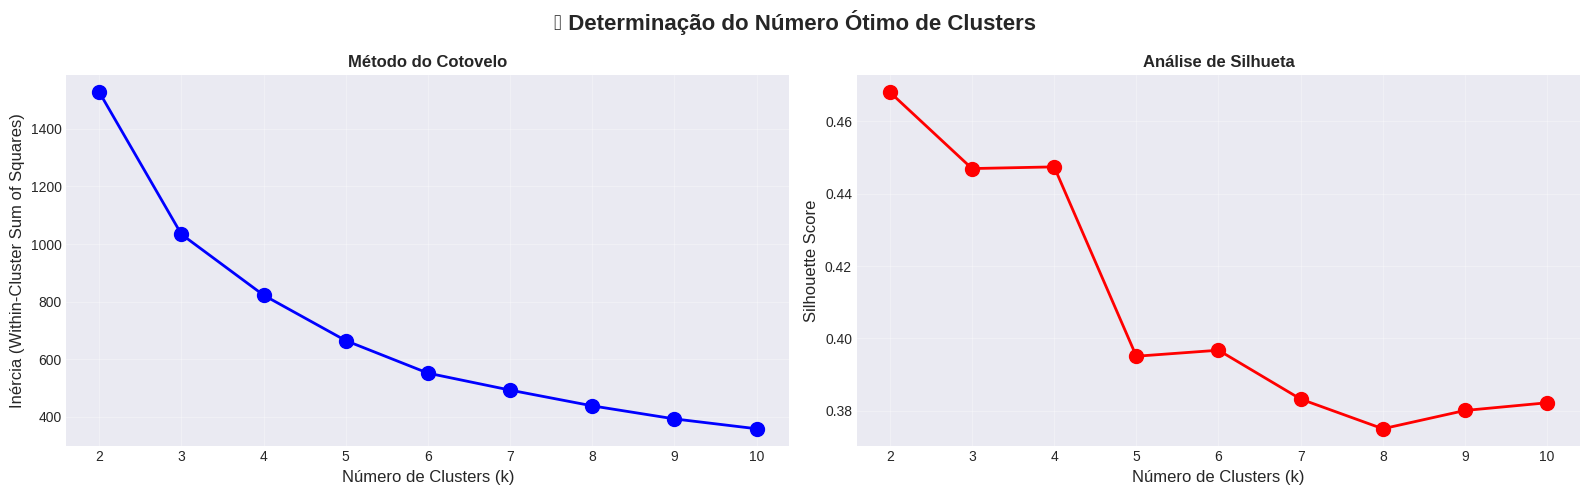


✅ Número ótimo sugerido (Silhouette): k = 2
   Silhouette Score: 0.4680


In [25]:
# Encontrar número ótimo de clusters - Método do Cotovelo
print("🔍 Procurando número ótimo de clusters...")

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plotar resultados
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('🔍 Determinação do Número Ótimo de Clusters', fontsize=16, fontweight='bold')

# Método do Cotovelo
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
axes[0].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inércia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Método do Cotovelo', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=10)
axes[1].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Análise de Silhueta', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Número ótimo sugerido
k_otimo = K_range[np.argmax(silhouette_scores)]
print(f"\n✅ Número ótimo sugerido (Silhouette): k = {k_otimo}")
print(f"   Silhouette Score: {max(silhouette_scores):.4f}")

### 9.3 K-means Clustering

In [26]:
# Aplicar K-means com k=4 (ajuste conforme análise anterior)
k_final = 4
print(f"\n🚀 Aplicando K-means com k = {k_final}")

kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
perfil_alunos['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

# Métricas de qualidade
silhouette = silhouette_score(X_cluster_scaled, perfil_alunos['cluster'])
davies_bouldin = davies_bouldin_score(X_cluster_scaled, perfil_alunos['cluster'])

print(f"\n📊 Métricas de Qualidade do Clustering:")
print(f"   • Silhouette Score: {silhouette:.4f} (quanto mais próximo de 1, melhor)")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f} (quanto menor, melhor)")
print(f"\n📈 Distribuição dos clusters:")
print(perfil_alunos['cluster'].value_counts().sort_index())


🚀 Aplicando K-means com k = 4

📊 Métricas de Qualidade do Clustering:
   • Silhouette Score: 0.4474 (quanto mais próximo de 1, melhor)
   • Davies-Bouldin Index: 0.9646 (quanto menor, melhor)

📈 Distribuição dos clusters:
cluster
0    146
1    390
2    162
3     83
Name: count, dtype: int64


### 9.4 Caracterização dos Clusters

In [27]:
# Caracterizar cada cluster
print("="*70)
print("👥 CARACTERIZAÇÃO DOS CLUSTERS")
print("="*70)

cluster_caracteristicas = perfil_alunos.groupby('cluster')[features_cluster].mean()
print("\n📊 Características médias por cluster:")
print(cluster_caracteristicas.round(2))

# Nomear clusters baseado nas características
def nomear_cluster(row):
    if row['taxa_aprovacao'] >= 0.8 and row['media_nota_media'] >= 70:
        return '🌟 Excelente'
    elif row['taxa_aprovacao'] >= 0.6 and row['media_nota_media'] >= 60:
        return '✅ Bom'
    elif row['taxa_aprovacao'] >= 0.4:
        return '⚠️ Regular'
    else:
        return '🚨 Crítico'

cluster_nomes = cluster_caracteristicas.apply(nomear_cluster, axis=1)
print("\n🏷️ Perfis identificados:")
for cluster_id, nome in cluster_nomes.items():
    qtd = (perfil_alunos['cluster'] == cluster_id).sum()
    perc = (qtd / len(perfil_alunos)) * 100
    print(f"   Cluster {cluster_id}: {nome} - {qtd} alunos ({perc:.1f}%)")

👥 CARACTERIZAÇÃO DOS CLUSTERS

📊 Características médias por cluster:
         media_nota_media  faltas_media  taxa_aprovacao  total_disciplinas
cluster                                                                   
0                   31.05         14.73            0.19               4.02
1                   72.49          4.63            0.91               4.40
2                   35.44         15.02            0.30               9.22
3                    4.40         44.30            0.01               3.84

🏷️ Perfis identificados:
   Cluster 0: 🚨 Crítico - 146 alunos (18.7%)
   Cluster 1: 🌟 Excelente - 390 alunos (49.9%)
   Cluster 2: 🚨 Crítico - 162 alunos (20.7%)
   Cluster 3: 🚨 Crítico - 83 alunos (10.6%)


### 9.5 Visualização dos Clusters

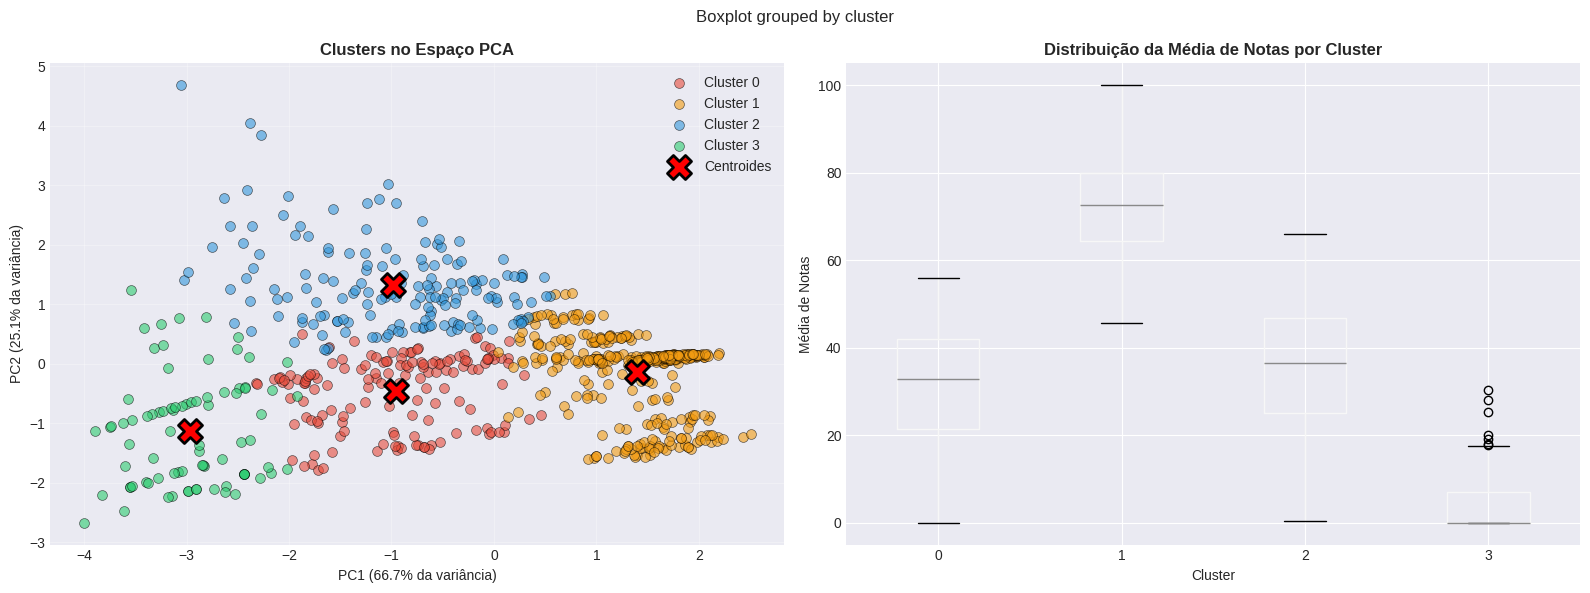

In [28]:
# Visualização com PCA (redução para 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

# Criar DataFrame para plotagem
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': perfil_alunos['cluster'].values
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Visualização dos Clusters', fontsize=16, fontweight='bold')

# Scatter plot com PCA
colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
for cluster_id in range(k_final):
    mask = df_pca['Cluster'] == cluster_id
    axes[0].scatter(df_pca[mask]['PC1'], df_pca[mask]['PC2'], 
                   c=colors[cluster_id], label=f'Cluster {cluster_id}', 
                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Plotar centroides
centroides_pca = pca.transform(kmeans_final.cluster_centers_)
axes[0].scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
               c='red', marker='X', s=300, edgecolors='black', linewidth=2, 
               label='Centroides', zorder=5)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% da variância)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% da variância)')
axes[0].set_title('Clusters no Espaço PCA', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot das características por cluster
perfil_alunos.boxplot(column='media_nota_media', by='cluster', ax=axes[1])
axes[1].set_title('Distribuição da Média de Notas por Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Média de Notas')

plt.tight_layout()
plt.show()

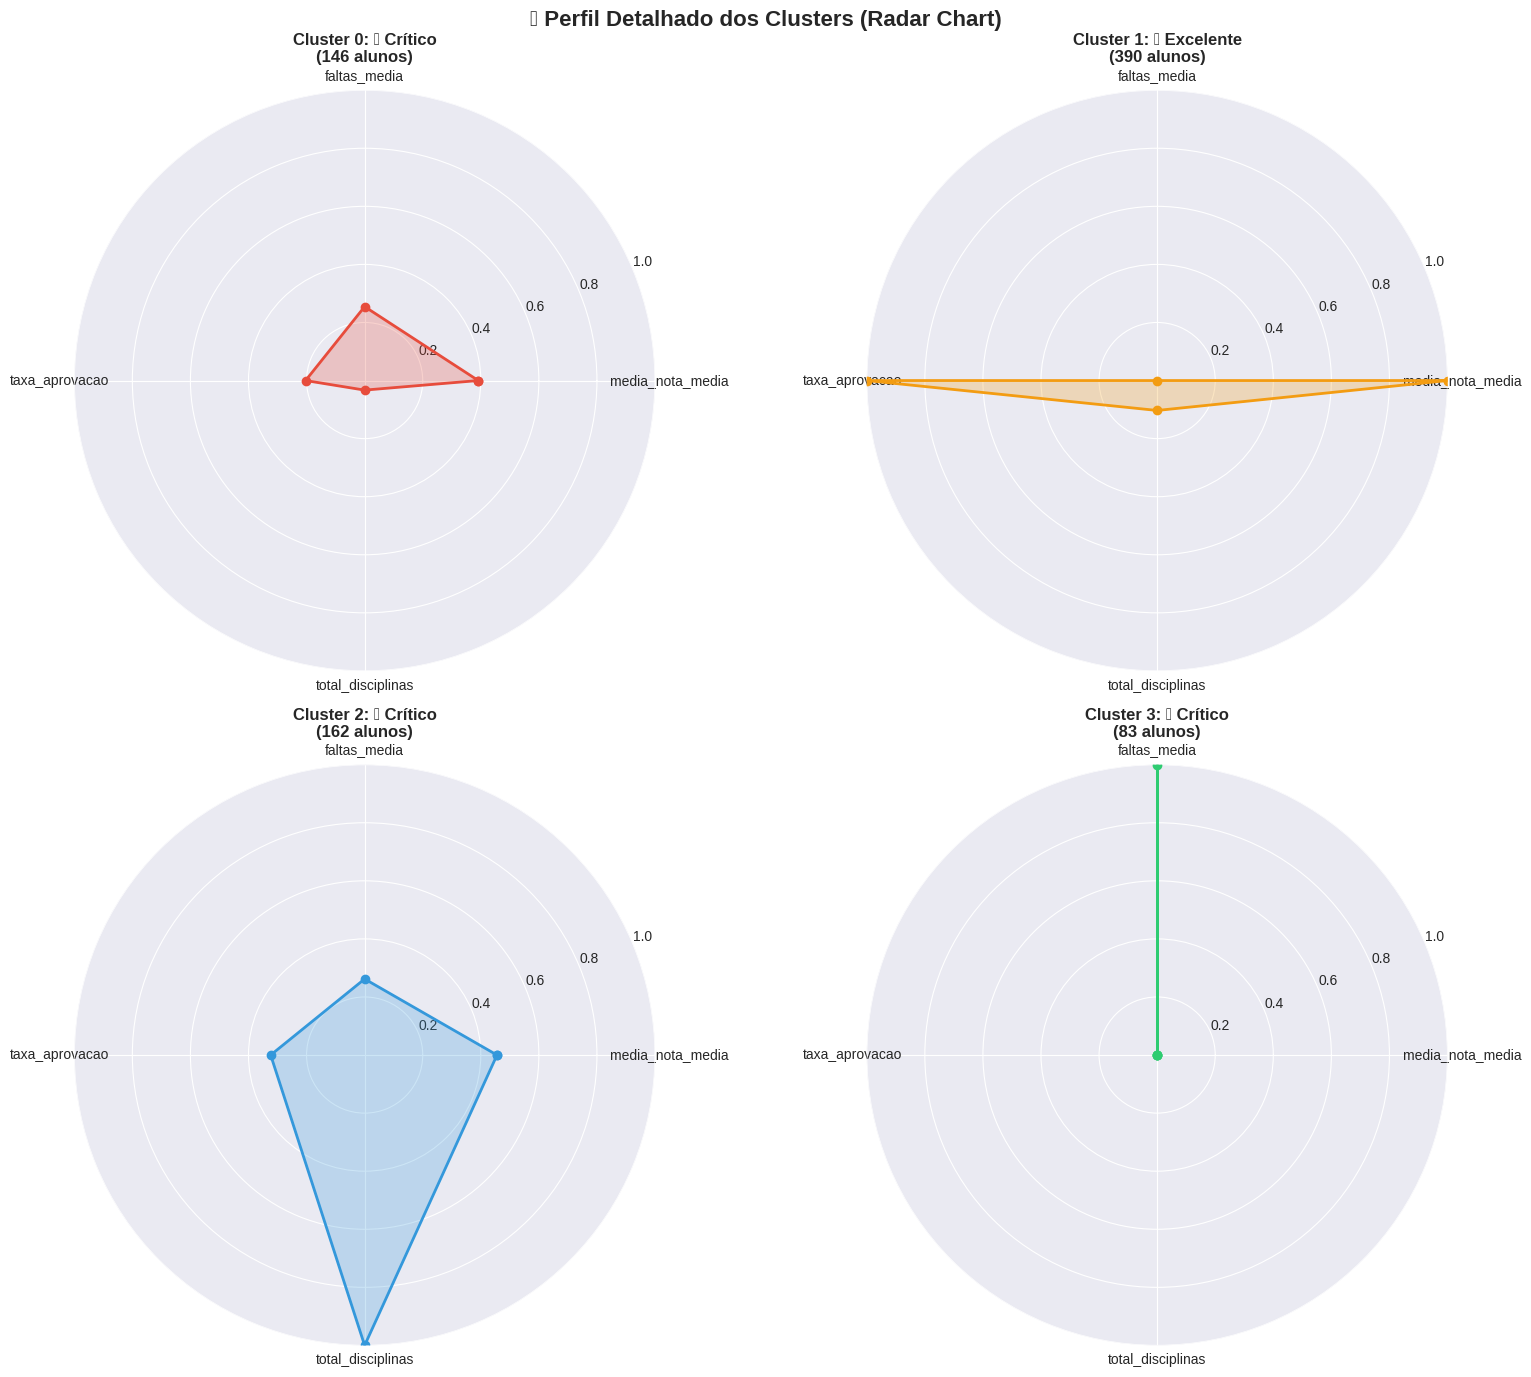

In [29]:
# Radar chart comparando clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 14), subplot_kw=dict(projection='polar'))
fig.suptitle('🎯 Perfil Detalhado dos Clusters (Radar Chart)', fontsize=16, fontweight='bold')

# Normalizar features para o radar chart
cluster_caracteristicas_norm = cluster_caracteristicas.copy()
for col in cluster_caracteristicas_norm.columns:
    max_val = cluster_caracteristicas_norm[col].max()
    min_val = cluster_caracteristicas_norm[col].min()
    if max_val > min_val:
        cluster_caracteristicas_norm[col] = (
            (cluster_caracteristicas_norm[col] - min_val) / (max_val - min_val)
        )

# Criar radar chart para cada cluster
categorias = features_cluster
num_vars = len(categorias)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

for idx, cluster_id in enumerate(range(k_final)):
    ax = axes[idx // 2, idx % 2]
    
    valores = cluster_caracteristicas_norm.iloc[cluster_id].values.tolist()
    valores += valores[:1]
    
    ax.plot(angles, valores, 'o-', linewidth=2, color=colors[cluster_id])
    ax.fill(angles, valores, alpha=0.25, color=colors[cluster_id])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias, size=10)
    ax.set_ylim(0, 1)
    ax.set_title(f'Cluster {cluster_id}: {cluster_nomes[cluster_id]}\n'
                f'({(perfil_alunos["cluster"] == cluster_id).sum()} alunos)', 
                fontweight='bold', size=12, pad=20)
    ax.grid(True)

plt.tight_layout()
plt.show()

## 📝 10. CONCLUSÕES E INSIGHTS

In [30]:
print("="*70)
print("📝 RESUMO EXECUTIVO - INSIGHTS E CONCLUSÕES")
print("="*70)

print("\n🎯 1. ANÁLISE EXPLORATÓRIA")
print(f"   • Taxa geral de aprovação: {(df_normal['APROVADO'].mean()*100):.1f}%")
print(f"   • Média geral de notas: {df_normal['MEDIA_FINAL'].mean():.2f}")
print(f"   • Média geral de faltas: {df_normal['NUM_FALTAS'].mean():.2f}")
print(f"   • Correlação Nota x Faltas: {correlation_matrix.loc['MEDIA_FINAL', 'NUM_FALTAS']:.3f}")

print("\n🏆 2. MODELOS DE CLASSIFICAÇÃO (Prever Aprovação)")
print(f"   • Melhor modelo: {melhor_modelo_class}")
print(f"   • Acurácia: {df_resultados_class.loc[melhor_modelo_class, 'accuracy']*100:.2f}%")
print(f"   • F1-Score: {df_resultados_class.loc[melhor_modelo_class, 'f1']:.4f}")

print("\n📈 3. MODELOS DE REGRESSÃO (Prever Média Final)")
print(f"   • Melhor modelo: {melhor_modelo_reg}")
print(f"   • R²: {df_resultados_reg.loc[melhor_modelo_reg, 'R²']:.4f}")
print(f"   • RMSE: {df_resultados_reg.loc[melhor_modelo_reg, 'RMSE']:.4f} pontos")

print("\n👥 4. CLUSTERING (Perfis de Alunos)")
print(f"   • Número de clusters identificados: {k_final}")
print(f"   • Silhouette Score: {silhouette:.4f}")
print(f"   • Perfis identificados:")
for cluster_id, nome in cluster_nomes.items():
    qtd = (perfil_alunos['cluster'] == cluster_id).sum()
    perc = (qtd / len(perfil_alunos)) * 100
    print(f"      - {nome}: {qtd} alunos ({perc:.1f}%)")

print("\n💡 5. PRINCIPAIS INSIGHTS")
print("   • O número de faltas é um forte preditor de reprovação")
print("   • Existe correlação negativa entre faltas e média final")
print("   • Modelos de ML conseguem prever aprovação com boa acurácia")
print("   • Identificamos perfis distintos de alunos")

print("\n🎓 6. RECOMENDAÇÕES")
print("   • Implementar sistema de alerta para alunos com muitas faltas")
print("   • Oferecer suporte adicional para clusters de risco")
print("   • Monitorar disciplinas com baixa taxa de aprovação")
print("   • Usar modelos preditivos para intervenção precoce")

print("\n" + "="*70)
print("✅ ANÁLISE COMPLETA FINALIZADA COM SUCESSO!")
print("="*70)

📝 RESUMO EXECUTIVO - INSIGHTS E CONCLUSÕES

🎯 1. ANÁLISE EXPLORATÓRIA
   • Taxa geral de aprovação: 50.5%
   • Média geral de notas: 47.04
   • Média geral de faltas: 12.87
   • Correlação Nota x Faltas: -0.632

🏆 2. MODELOS DE CLASSIFICAÇÃO (Prever Aprovação)
   • Melhor modelo: SVM RBF
   • Acurácia: 80.17%
   • F1-Score: 0.8223

📈 3. MODELOS DE REGRESSÃO (Prever Média Final)
   • Melhor modelo: MLP Regressor
   • R²: 0.5709
   • RMSE: 21.2621 pontos

👥 4. CLUSTERING (Perfis de Alunos)
   • Número de clusters identificados: 4
   • Silhouette Score: 0.4474
   • Perfis identificados:
      - 🚨 Crítico: 146 alunos (18.7%)
      - 🌟 Excelente: 390 alunos (49.9%)
      - 🚨 Crítico: 162 alunos (20.7%)
      - 🚨 Crítico: 83 alunos (10.6%)

💡 5. PRINCIPAIS INSIGHTS
   • O número de faltas é um forte preditor de reprovação
   • Existe correlação negativa entre faltas e média final
   • Modelos de ML conseguem prever aprovação com boa acurácia
   • Identificamos perfis distintos de alunos

🎓 6

## 💾 11. Exportar Resultados

In [31]:
# Salvar resultados em CSV
print("💾 Salvando resultados...")

# Resultados de classificação
df_resultados_class.to_csv('resultados_classificacao.csv')
print("   ✅ resultados_classificacao.csv")

# Resultados de regressão
df_resultados_reg.to_csv('resultados_regressao.csv')
print("   ✅ resultados_regressao.csv")

# Perfil de alunos com clusters
perfil_alunos.to_csv('perfil_alunos_clusters.csv', index=False)
print("   ✅ perfil_alunos_clusters.csv")

# Estatísticas por disciplina
disciplina_stats.to_csv('estatisticas_disciplinas.csv')
print("   ✅ estatisticas_disciplinas.csv")

print("\n✅ Todos os resultados foram salvos com sucesso!")

💾 Salvando resultados...
   ✅ resultados_classificacao.csv
   ✅ resultados_regressao.csv
   ✅ perfil_alunos_clusters.csv
   ✅ estatisticas_disciplinas.csv

✅ Todos os resultados foram salvos com sucesso!


---

## 📚 Referências e Observações

### Técnicas Utilizadas:
- **Regressão Linear/Ridge**: Modelo dos Mínimos Quadrados, Regularização de Tikhonov
- **SVM**: Margens Rígidas e Suaves, Kernel Trick (RBF)
- **Redes Neurais**: Perceptron Múltiplas Camadas (MLP), Backpropagation
- **Clustering**: K-means, Método do Cotovelo, Análise de Silhueta
- **Redução de Dimensionalidade**: PCA (Análise de Componentes Principais)

### Métricas Importantes:
- **Classificação**: Acurácia, Precisão, Recall, F1-Score, Matriz de Confusão
- **Regressão**: R², RMSE, MAE, Análise de Resíduos
- **Clustering**: Silhouette Score, Davies-Bouldin Index

---

**🎓 Notebook criado para análise completa de desempenho acadêmico**  
**📧 Dúvidas e sugestões são bem-vindas!**